<a href="https://colab.research.google.com/github/Tamaghnatech/Loanpredict/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries

---

Hey there, data enthusiasts! 📊 Let's dive into the world of data analysis and visualization by understanding this code block step by step. We'll start with the basics and gradually explore the different components. Ready? Let's go!

**1. Importing Libraries:**
We're using some essential libraries to work with data and create visualizations. These include `os` for system operations, `numpy` for numerical operations, `pandas` for data manipulation, `matplotlib.pyplot` for plotting, `seaborn` for stylish visualizations, `warnings` to manage warnings, and `scipy.stats` for statistical calculations.

**2. Library Settings:**
We want to make our environment user-friendly. To do this:
- We're silencing certain warnings, which can clutter our output.
- We're enabling multiple outputs from a single cell, making our interactions more engaging.
- With `%matplotlib inline`, our plots will appear directly in the notebook.
- Using `np.set_printoptions(suppress=True)`, we're avoiding scientific notation for better readability.

**3. Function Definition:**
We're introducing a handy function named `set_seed()`. This function:
- Lets us set a specific random seed (if desired) for consistent random results.
- Ensures reproducibility by setting the seed for both numpy's random operations and Python's hash operations.

**4. Pandas Options:**
We're optimizing our pandas display settings for better readability:
- We're adjusting the display width, ensuring our data doesn't get cut off.
- Setting maximum display for columns and rows, preventing overwhelming output.
- Applying a neat float formatting function to display numbers with up to three decimal places.
---


In [ ]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

##Plot Function


1. **`numerical_plotting`**:
   This function creates a 2x1 grid of plots for exploring numerical data:
   - The top subplot contains a boxplot to visualize the distribution of a variable.
   - The bottom subplot displays a distribution plot along with key statistics lines (mean, median, max, min, mode).

2. **`count_pie_plot`**:
   This function generates a 1x2 grid of plots to analyze categorical data:
   - The left subplot shows a pie chart representing the distribution of a categorical variable.
   - The right subplot displays a count plot to visualize the frequency of each category.

3. **`countplot_y`**:
   This function creates a vertical count plot for categorical variables:
   - The plot represents the count of each category on the y-axis, helping to visualize frequency.
   - Data labels are displayed on the bars to show the count.

4. **`bivariate_numerical_plot`**:
   This function produces a KDE plot to explore the relationship between two numerical variables:
   - The plot shows how the distribution of one variable varies based on different categories of another variable (hue).

5. **`mtvboxplot`**:
   This function generates a grouped box plot to compare two numerical variables across different categories:
   - The x-axis represents a categorical variable, while the y-axis displays the values of the numerical variable.
   - The plot allows us to visually compare the distributions of the numerical variable across categories.



In [ ]:
def numerical_plotting(data, col, title, symb, ylabel, color):
    fig, ax = plt.subplots(2, 1,
                           sharex=True,
                           figsize=(20, 8),
                           facecolor="#FFFFFF",
                           gridspec_kw={"height_ratios": (.2, .8)})

    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")

    ax[0].set_title(title,
                    weight="bold",
                    fontsize=30,
                    pad=30)

    sns.boxplot(x=col,
                data=data,
                color=color,
                ax=ax[0])

    ax[0].set(yticks=[])

    sns.distplot(data[col], kde=True, color=color)

    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)

    ax[0].set_xlabel(col, weight="bold", fontsize=15, labelpad=15)
    ax[1].set_xlabel(col, weight="bold", fontsize=15)
    ax[1].set_ylabel(ylabel, weight="bold", fontsize=15)

    plt.axvline(data[col].mean(),
                color='darkgreen',
                linewidth=2.2,
                label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(),
                color='red',
                linewidth=2.2,
                label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].max(),
                color='blue',
                linewidth=2.2,
                label='max='+ str(np.round(data[col].max(),1)) + symb)
    plt.axvline(data[col].min(),
                color='orange',
                linewidth=2.2,
                label='min='+ str(np.round(data[col].min(),1)) + symb)
    plt.axvline(data[col].mode()[0],
                color='purple',
                linewidth=2.2,
                label='mode='+ str(data[col].mode()[0]) + symb)


    plt.legend(bbox_to_anchor=(1, 1),
               ncol=1,
               fontsize=17,
               fancybox=True,
               shadow=True,
               frameon=False)

    plt.tight_layout()
    plt.show()

def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus,
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2,
                                   nrows=1,
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))

    datapie.plot(kind="pie",
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black",
                                weight="bold"))

    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)

    #title
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()

    ax1.text(x0, y1 * 1.40,
             text1,
             fontsize=30,
             ha="left",
             va="center",
             weight="bold")
    ax1.text(x0, y1 * 1.25,
             text2,
             fontsize=18,
             ha="left",
             va="center")

    ax1.legend(pielabels,
               loc="upper left",
               bbox_to_anchor=(x0*0.01, y1*0.85),
               prop={'size': 10.5}, frameon=False, ncol=len(datapie))

    ax2.set_xlabel(xlabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_ylabel(ylabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_xticklabels(labels=xticklabel,
                        weight="semibold",
                        fontsize=10,
                        rotation=xtickrotation)
    ax2.set_yticklabels(labels=yticklabel,
                        weight="semibold",
                        fontsize=10)

    # data label
    i=0

    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + yplus
        ax2.text(x, y, value, ha="center", va="center", fontsize=15, weight="semibold")

    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)

    plt.tight_layout()
    return fig

def countplot_y(data, xplus, coly, sizey, text1, text2,
                xlabel, ylabel, xstart, xend, ytimes1, ytimes2):

    fig, ax = plt.subplots(ncols=1,
                           nrows=1,
                           facecolor=("#FFFFFF"),
                           figsize=(24, sizey))

    sns.countplot(y=coly,
                  data=data,
                  palette=['#E0144C', '#FF5858', '#3AB0FF', '#FFB562', '#6FEDD6', '#6D9885'],
                  ax=ax)

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    ax.text(x0, y1 * ytimes1,
            text1, fontsize=30,
            ha="left", va="center", weight="bold")
    ax.text(x0, y1 * ytimes2,
            text2, fontsize=18,
            ha="left", va="center")

    plt.xticks(weight="bold",
               fontsize=10)
    plt.yticks(weight="bold",
               fontsize=10)
    plt.xlabel(xlabel, weight="bold",
               fontsize=25, labelpad=20)
    plt.ylabel(ylabel, weight="bold",
               fontsize=25, labelpad=20)

    # data label
    i=0

    for p in ax.patches:
        value = f'{p.get_width()}'
        if i < 7:
            x1 = -1.2
        else:
            x1 = 1.2

        i+=1
        x = p.get_x() + p.get_width() + xplus
        y = p.get_y() + p.get_height() -.4
        ax.text(x, y, value, ha='center', va='center', fontsize=15, weight='semibold')

    plt.tight_layout()
    ax.set_xlim(xstart, xend)
    ax.set_facecolor("#FFFFFF")

    return fig

def bivariate_numerical_plot(data, x, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(20, 6),
                           facecolor="#FFFFFF")
    sns.kdeplot(data=data,
                x=x,
                hue=hue,
                fill=True)

    ax.set_facecolor("#FFFFFF")

    plt.title(title, weight="bold",
              fontsize=25, pad=30)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold",
               fontsize=15, labelpad=15)
    plt.ylabel(ylabel, weight="bold",
               fontsize=15, labelpad=15)
    plt.tight_layout()
    plt.show()

def mtvboxplot(data, x, y, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(24, 8))
    sns.boxplot(x=x, y=y, hue=hue,
                data=data, ax=ax)
    plt.title(title, weight="bold",
              fontsize=25, pad=25)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold",
               fontsize=15, labelpad=10)
    plt.ylabel(ylabel, weight="bold",
               fontsize=15, labelpad=10)
    plt.tight_layout()
    plt.show()

##Stats Function


1. **`spearman_correlation`**:
   This function calculates Spearman's correlation coefficient and its significance between two datasets:
   - It prints the correlation coefficient, which quantifies the strength and direction of monotonic relationships.
   - It interprets the significance of the correlation by comparing the p-value to a significance level (alpha).

2. **`pearson_correlation`**:
   This function computes Pearson's correlation coefficient and its significance between two datasets:
   - It calculates the Pearson correlation coefficient, which measures linear relationships between variables.
   - It interprets the significance of the correlation based on the p-value and a predefined significance level.

3. **`skew_kurtosis`**:
   This function calculates skewness and kurtosis of a dataset and provides insights about its distribution:
   - It computes skewness, indicating the degree of asymmetry in the distribution.
   - It computes kurtosis, describing the peakedness or flatness of the distribution.
   - It interprets skewness and kurtosis values to determine whether the distribution is skewed or exhibits extreme tails.

4. **`chebychev`**:
   This function applies Chebyshev's inequality to a dataset to provide a rough estimate of data dispersion:
   - It calculates the lower and upper bounds for data within a certain number of standard deviations from the mean.
   - It offers an interpretation of what percentage of data is expected to fall within these bounds based on Chebyshev's theorem.



In [ ]:
def spearman_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Spearman's Correlation
    coef, p = stats.spearmanr(data1, data2)
    print(f"Spearmans correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()

def pearson_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Pearson's Correlation
    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()

def skew_kurtosis(data, title):
    skw = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, bias=False)

    print("-" * 20, title, "-" * 20)
    print(f"Skewness: {skw}")
    if (skw < -1) and (skw > 1):
        print("Highly skewed")
    elif (-1 < skw < -0.5) or (1 < skw < 0.5):
        print("Moderately skewed")
    elif (-0.5 < skw < 0.5):
        print("Approximately symmetric")
    print("-" * 35)
    print(f"Kurtosis: {kurt}")
    if (kurt > 1):
        print("The distribution is too peaked")
    elif (kurt < -1):
        print("The distribution is too flat")
    else:
        print("The distribution is non-normal")
    print("-" * 35)

def chebychev(data, title, interpret):
    mu = round(data.mean(), 1)
    s = round(data.std(), 1)

    fc = round(mu - (2 * s), 1)
    sc = round(mu + (2 * s), 1)

    print("-" * 20, f"Interpretation of {title}", "-" * 20)
    print(f"first calc: {fc}")
    print(f"second calc: {sc}")
    print(interpret)
    print("-" * 40)

##Reading the dataset

In [ ]:
df = pd.read_csv("/content/Training Data.csv", index_col="Id").dropna()
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


##Checking the Dataset

In [ ]:
df.info() # Getting information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


##Categorical Variables
Looking at unique categorial variables

In [ ]:
categorical = df.select_dtypes(["category", "object"]).columns

for cat_col in categorical:
    print(f"{cat_col}: {df[cat_col].nunique()} uniqueness variable")

Married/Single: 2 uniqueness variable
House_Ownership: 3 uniqueness variable
Car_Ownership: 2 uniqueness variable
Profession: 51 uniqueness variable
CITY: 317 uniqueness variable
STATE: 29 uniqueness variable


##Discrete and Continous Variables
Looking at discrete and continous variables

In [ ]:
numeric = df.select_dtypes(["int", "float"]).columns

for num_col in numeric:
    print(f"{num_col}: {df[num_col].nunique()} uniqueness variable")

Income: 41920 uniqueness variable
Age: 59 uniqueness variable
Experience: 21 uniqueness variable
CURRENT_JOB_YRS: 15 uniqueness variable
CURRENT_HOUSE_YRS: 5 uniqueness variable
Risk_Flag: 2 uniqueness variable


##Missing Points in data

In [ ]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

Income             0
Age                0
Experience         0
Married/Single     0
House_Ownership    0
Car_Ownership      0
Profession         0
CITY               0
STATE              0
CURRENT_JOB_YRS    0
dtype: int64

##Unique variables in categorial data

In [ ]:
df.Profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [ ]:
df.CITY.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [ ]:
df.STATE.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

**Now we can see that mane City and State names have brackets in their, that can cause major inconsistencies, even if we want to use One Hot Encoder it can cause problems**

##Data Cleaning

In [ ]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['income', 'age', 'experience', 'married/single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [ ]:
df.rename(columns={"married/single": "married_single"}, inplace=True)
df.columns

Index(['income', 'age', 'experience', 'married_single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

Cleaning City and State variable names for reducing inconsistencies

In [ ]:
df.city = df.city.str.extract("([A-Za-z]+)")
df.city.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'Aligarh'

In [ ]:
df.state = df.state.str.extract("([A-Za-z]+)")
df.state.unique()

array(['Madhya', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil', 'Gujarat',
       'Rajasthan', 'Telangana', 'Bihar', 'Andhra', 'West', 'Haryana',
       'Puducherry', 'Karnataka', 'Uttar', 'Himachal', 'Punjab',
       'Tripura', 'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu',
       'Delhi', 'Chhattisgarh', 'Chandigarh', 'Manipur', 'Sikkim'],
      dtype=object)

Random Under Sampling

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
risk_data = df.loc[df["risk_flag"] == 1]
not_risk_data = df.loc[df["risk_flag"] == 0][:30996]

normal_distributed_data = pd.concat([risk_data, not_risk_data])

# Shuffle dataframe rows
loan = normal_distributed_data.sample(frac=1, random_state=42)

loan.head()

,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
Id,,,,,,,,,,,,
95248,961937,57,13,single,rented,no,Graphic_Designer,Avadi,Tamil,5,10,0
172687,2213599,39,4,single,rented,no,Police_officer,Bhalswa,Delhi,4,13,0
49811,7783136,44,13,single,rented,no,Physician,Miryalaguda,Telangana,9,12,0
71724,3779002,57,8,single,rented,no,Graphic_Designer,Amravati,Maharashtra,8,14,1
36572,8896315,27,5,single,rented,no,Aviator,Amravati,Maharashtra,5,12,1


Equally distributing and correlating

0   0.500
1   0.500
Name: risk_flag, dtype: float64


<Axes: xlabel='risk_flag', ylabel='count'>

Text(0.5, 1.0, 'Equally Distributed Risk Flag')

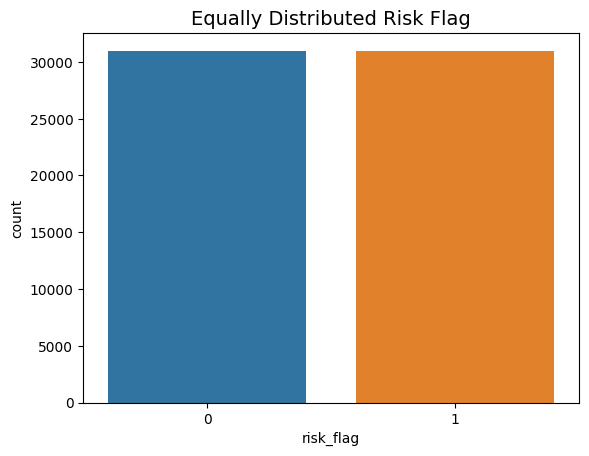

In [ ]:
# Print the distribution of the risk_flag in the subsample dataset
print(loan["risk_flag"].value_counts() / len(loan))

# Plot the count of risk_flag using sns.countplot
sns.countplot(x="risk_flag", data=loan)
plt.title('Equally Distributed Risk Flag', fontsize=14)
plt.show()


##Data Analysis

In [ ]:
loan.describe(exclude=[np.number])

,married_single,house_ownership,car_ownership,profession,city,state
count,61992,61992,61992,61992,61992,61992
unique,2,3,2,51,316,28
top,single,rented,no,Air_traffic_controller,Aurangabad,Uttar
freq,56091,57518,44053,1418,367,7043


In [ ]:
loan.describe(include=[np.number])

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,61992.000,61992.000,61992.000,61992.000,61992.000,61992.000
mean,4975818.051,49.550,9.839,6.274,11.993,0.500
std,2898794.431,17.175,6.024,3.683,1.399,0.500
min,10310.000,21.000,0.000,0.000,10.000,0.000
25%,2436226.250,34.000,5.000,3.000,11.000,0.000
50%,4979427.500,49.000,10.000,6.000,12.000,0.500
75%,7503751.000,64.000,15.000,9.000,13.000,1.000
max,9999400.000,79.000,20.000,14.000,14.000,1.000


In [ ]:
# Grouping profession by its income in min, max, and mean
loan.groupby("profession")["income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

profession,Librarian,Drafter,Secretary,Designer,Surveyor,Computer_hardware_engineer,Official,Analyst,Surgeon,Police_officer,Biomedical_Engineer,Physician,Industrial_Engineer,Psychologist,Comedian,Technology_specialist,Engineer,Hotel_Manager,Technician,Magistrate,Web_designer,Flight_attendant,Civil_engineer,Statistician,Dentist,Artist,Lawyer,Air_traffic_controller,Architect,Firefighter,Financial_Analyst,Mechanical_engineer,Graphic_Designer,Scientist,Geologist,Consultant,Army_officer,Design_Engineer,Microbiologist,Software_Developer,Chef,Computer_operator,Politician,Technical_writer,Civil_servant,Aviator,Economist,Chartered_Accountant,Fashion_Designer,Chemical_engineer,Petroleum_Engineer
min,59715.000,64805.000,143036.000,59974.000,11114.000,60845.000,216875.000,11550.000,18215.000,61083.000,51974.000,12608.000,21995.000,67043.000,13429.000,75855.000,10310.000,17801.000,16045.000,36049.000,57735.000,11695.000,25674.000,46244.000,69549.000,31297.000,64122.000,33649.000,25096.000,29380.000,80183.000,56449.000,10675.000,28561.000,34955.000,25161.000,12902.000,53886.000,12825.000,66912.000,15016.000,41719.000,87051.000,44078.000,11430.000,146151.000,16890.000,23621.000,12766.000,26926.000,80603.000
max,9999400.000,9999180.000,9998070.000,9996946.000,9994518.000,9994501.000,9993041.000,9992133.000,9990538.000,9987955.000,9987812.000,9987805.000,9986330.000,9985964.000,9984878.000,9984686.000,9983889.000,9983764.000,9982680.000,9982430.000,9980350.000,9979070.000,9979065.000,9978516.000,9977890.000,9976619.000,9976302.000,9975789.000,9974540.000,9974101.000,9972303.000,9971347.000,9970754.000,9970052.000,9969924.000,9967854.000,9967074.000,9962923.000,9962662.000,9962479.000,9952217.000,9946468.000,9945612.000,9945173.000,9938741.000,9935192.000,9932245.000,9926354.000,9915463.000,9914171.000,9907636.000
mean,4933638.026,4167416.841,5447861.500,5415495.726,5410266.647,5181116.221,4618685.001,4938745.783,5182754.125,4430359.643,5204435.489,4798618.435,5003824.291,5307101.951,5120570.234,4905812.169,4717352.041,4715212.724,5216179.325,4623297.788,5152770.604,4712857.783,5052005.988,4913711.126,4823621.554,4993736.544,5069256.918,4831977.475,5125274.634,4968357.588,4884621.424,4900836.277,4678245.776,5677094.505,4711148.824,4560076.376,5649491.240,4781622.577,4903062.177,4506216.939,4999422.067,4874241.465,4853958.201,5067929.633,4752588.956,5016283.123,4967258.604,5148545.106,4932853.238,5556876.028,5407122.071


In [ ]:
# The average risk percentage of each city
loan.groupby(["city"]).risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

city,Bhubaneswar,Bettiah,Gwalior,Raiganj,Kochi,Buxar,Purnia,Gandhidham,Satna,Barasat,Muzaffarnagar,Sikar,Mysore,Mathura,Bardhaman,Udaipur,Ahmedabad,Hazaribagh,Kavali,Ramagundam,Kottayam,Munger,Thiruvananthapuram,Amravati,Ghaziabad,Panipat,Mango,Davanagere,North,Tinsukia,...,Sasaram,Arrah,Malegaon,Kumbakonam,Farrukhabad,Orai,Ahmednagar,Khora,Warangal,Tiruvottiyur,Noida,Raichur,Katni,Bhagalpur,Gangtok,Hosur,Panihati,Belgaum,Mehsana,Tadipatri,Berhampur,Bareilly,Latur,Mira,Rajpur,Bijapur,Bangalore,Sultan,Dehradun,Gandhinagar
risk_flag,80.816,74.390,72.727,72.574,71.053,70.807,70.659,68.776,68.639,68.212,68.137,67.254,67.078,66.667,66.520,66.477,65.842,65.660,65.603,65.385,65.125,64.469,64.437,64.062,64.052,63.131,63.091,62.879,62.667,62.646,...,32.051,31.937,31.792,31.579,31.472,30.994,30.159,29.474,29.412,29.012,28.889,28.571,28.000,27.273,26.667,26.446,26.282,25.385,24.286,23.423,23.423,23.404,22.549,22.131,21.429,20.408,19.853,19.780,16.197,16.038


In [ ]:
# The average risk percentage of each state
loan.groupby("state").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

state,Manipur,Tripura,Kerala,Jammu,Madhya,Chhattisgarh,Odisha,Rajasthan,Assam,Jharkhand,Himachal,West,Telangana,Bihar,Gujarat,Haryana,Uttar,Andhra,Puducherry,Maharashtra,Mizoram,Delhi,Tamil,Karnataka,Chandigarh,Punjab,Uttarakhand,Sikkim
risk_flag,60.596,60.444,58.610,58.230,55.897,54.074,53.678,53.366,52.306,52.092,51.628,51.410,51.364,50.697,50.168,49.645,48.843,48.488,48.406,48.066,46.766,45.304,45.300,44.267,41.781,41.383,36.240,26.667


In [ ]:
# The average risk percentage of each profession
loan.groupby("profession").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

profession,Chartered_Accountant,Police_officer,Army_officer,Software_Developer,Surveyor,Civil_engineer,Geologist,Firefighter,Technical_writer,Scientist,Hotel_Manager,Aviator,Official,Physician,Biomedical_Engineer,Architect,Flight_attendant,Technician,Chef,Microbiologist,Consultant,Secretary,Artist,Computer_operator,Air_traffic_controller,Lawyer,Magistrate,Computer_hardware_engineer,Surgeon,Psychologist,Analyst,Comedian,Mechanical_engineer,Statistician,Politician,Engineer,Chemical_engineer,Web_designer,Civil_servant,Fashion_Designer,Designer,Dentist,Graphic_Designer,Librarian,Drafter,Financial_Analyst,Design_Engineer,Industrial_Engineer,Economist,Petroleum_Engineer,Technology_specialist
risk_flag,58.723,58.457,56.181,55.928,55.564,54.239,54.180,53.779,53.410,53.159,52.866,52.365,51.821,51.787,51.781,51.648,51.170,51.148,51.135,51.094,50.931,50.652,50.508,50.448,50.423,50.363,50.000,49.748,49.684,49.510,49.048,48.459,48.299,48.135,47.762,47.752,47.506,47.462,47.447,47.442,47.048,46.953,46.782,46.768,46.396,45.517,45.422,43.973,43.780,39.107,38.218


In [ ]:
# The average risk percentage whether the customer married or single
loan.groupby("married_single").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

married_single,single,married
risk_flag,50.561,44.670


In [ ]:
# The average risk percentage whether the customer owned car or not
loan.groupby("car_ownership").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

car_ownership,no,yes
risk_flag,51.213,47.020


**Top 5 Profession Incomes (Mean):**
1. Drafter: Min $64,805, Max $9,999,180, Mean $4,377,671
2. Secretary: Min $84,491, Max $9,998,070, Mean $5,414,040
3. Computer Hardware Engineer: Min $87,298, Max $9,994,501, Mean $5,444,923
4. Analyst: Min $71,666, Max $9,992,133, Mean $4,919,342
5. Official: Min $132,028, Max $9,991,569, Mean $4,650,842

**Top 5 Cities by Risk Flag Average Percentage:**
1. Bhubaneswar: 75%
2. Bettiah: 73.4%
3. Gwalior: 71.7%
4. Kavali: 71.4%
5. Bardhaman: 71.2%

**Top 5 States by Risk Flag Average Percentage:**
1. Manipur: 67.5%
2. Kerala: 57.5%
3. Tripura: 56.9%
4. Madhya: 56.5%
5. Jammu: 56.3%

**Top 5 Professions by Risk Flag Average Percentage:**
1. Police Officer: 59%
2. Software Developer: 56.0%
3. Army Officer: 55.5%
4. Chartered Accountant: 55.5%
5. Geologist: 55.2%

**Average Risk Percentage by Marital Status:**
- Single: 50.5%
- Married: 45.1%

**Average Risk Percentage by Car Ownership:**
- No: 51.2%
- Yes: 46.9%



##Numerical Analaysis

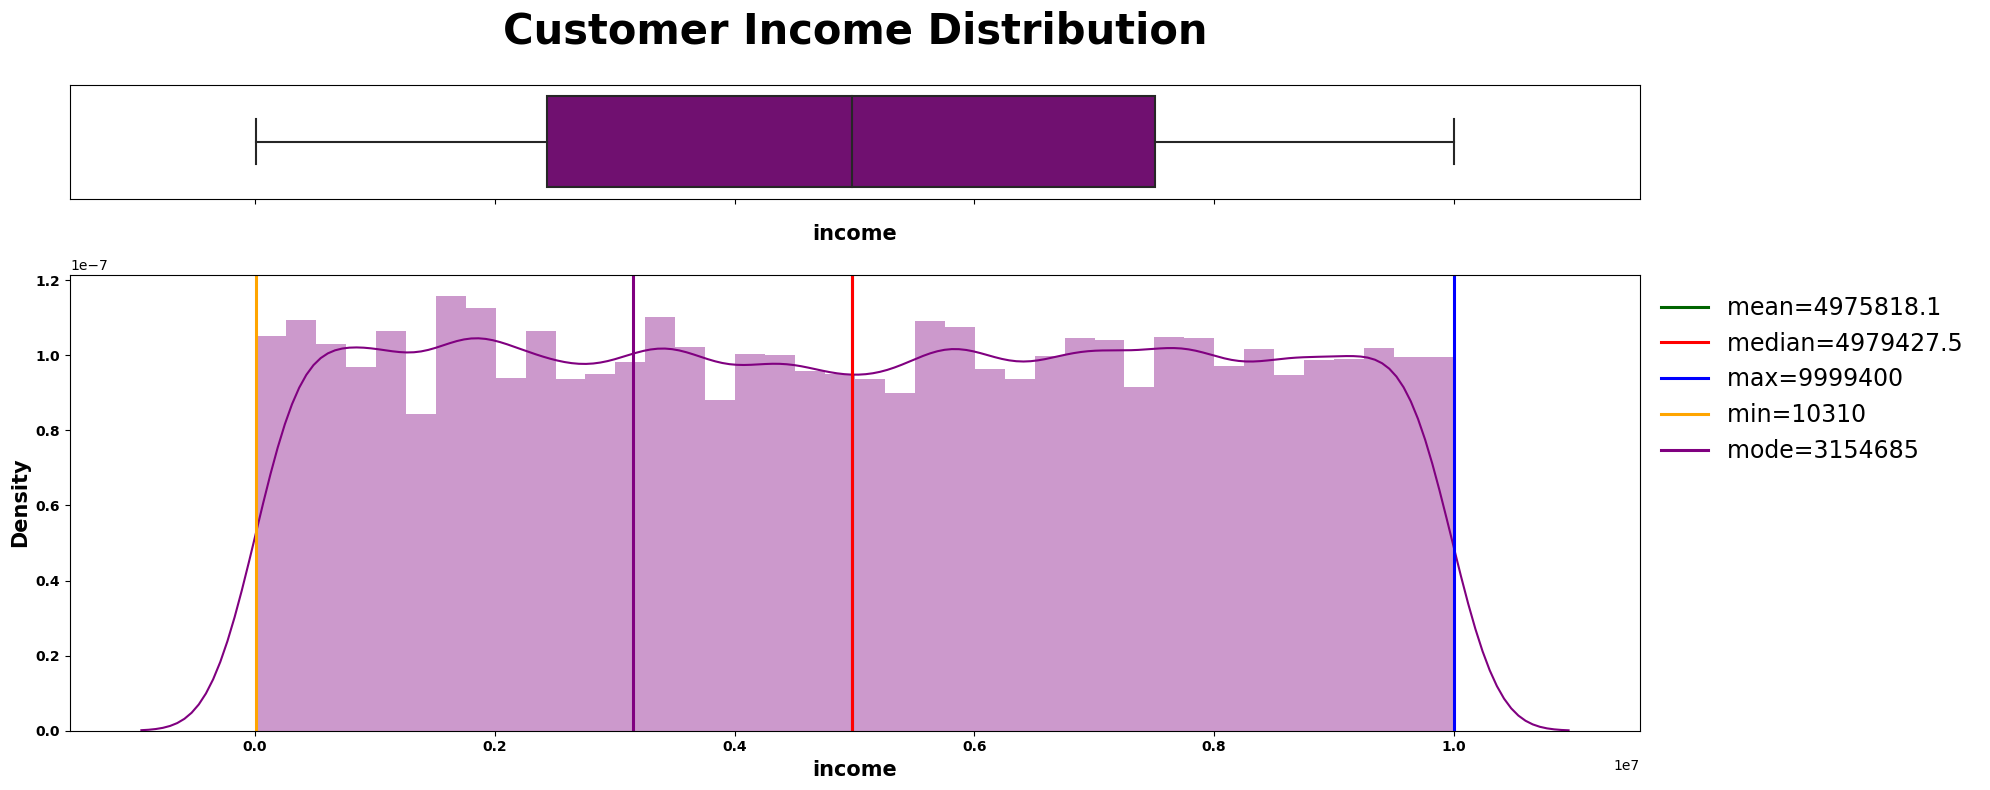

In [ ]:
numerical_plotting(data=loan, col="income",
                   title="Customer Income Distribution",
                   symb=" ", ylabel="Density", color="purple");

In [ ]:
chebychev(loan.income, title="Income",
          interpret=f"at least 75% customer income is lies between 0 and 10.785.254 Rupee")

-------------------- Interpretation of Income --------------------
first calc: -821770.7
second calc: 10773406.9
at least 75% customer income is lies between 0 and 10.785.254 Rupee
----------------------------------------


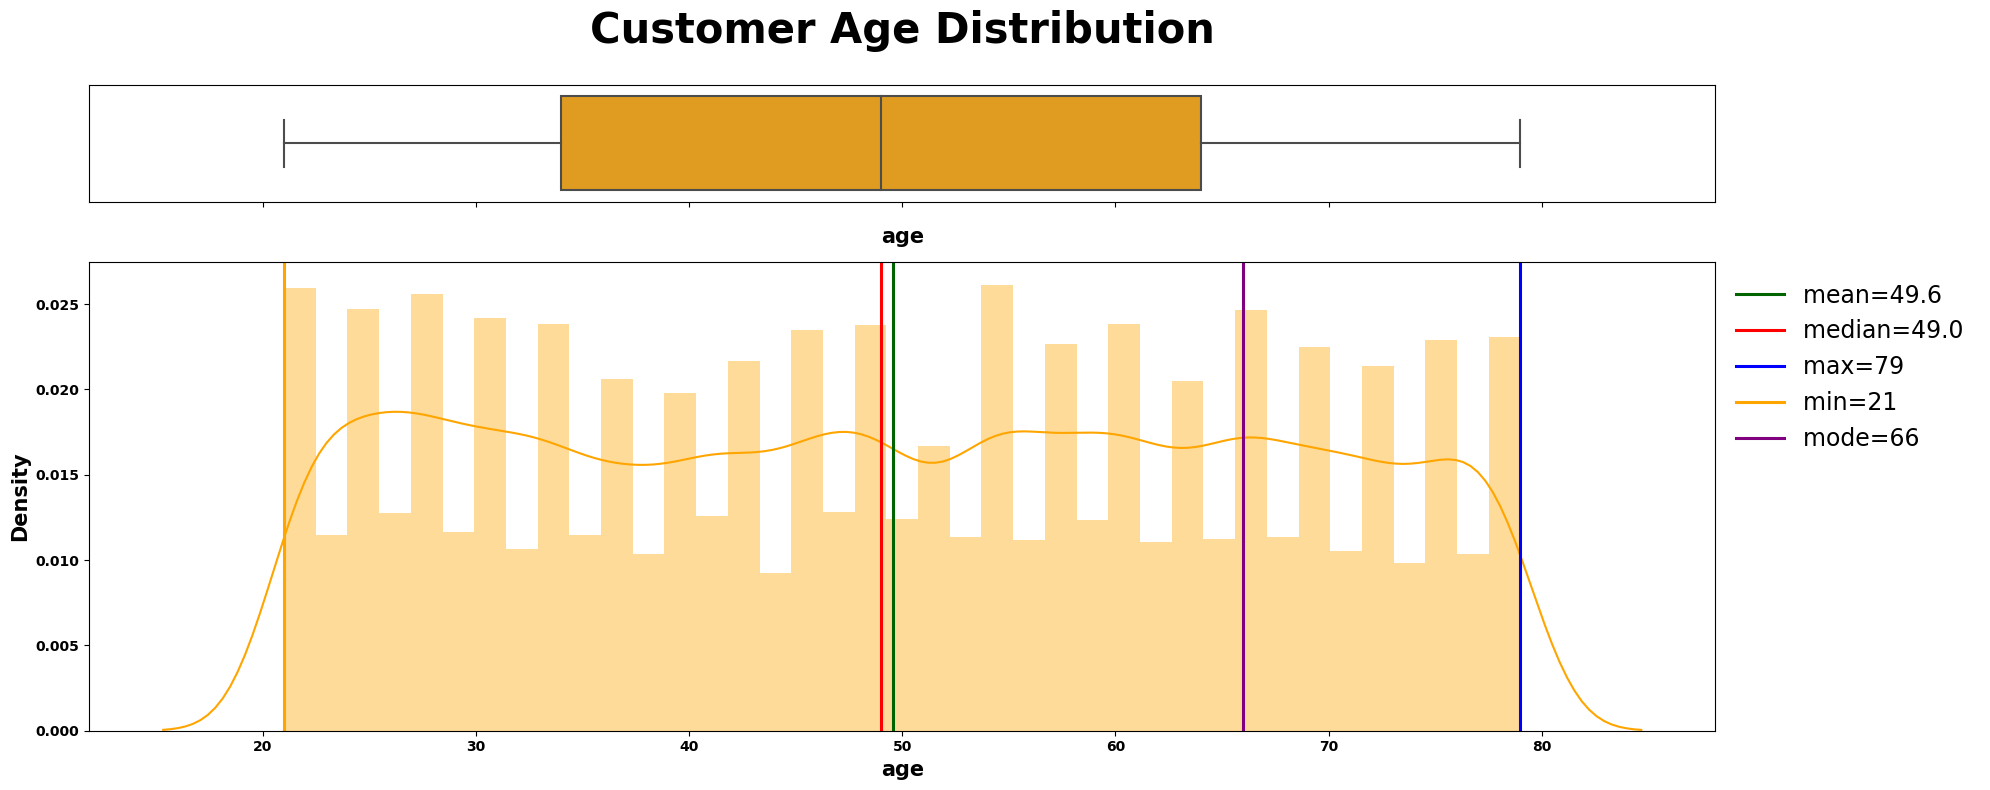

In [ ]:
numerical_plotting(data=loan, col="age",
                   title="Customer Age Distribution",
                   symb=" ", ylabel="Density", color="orange");

In [ ]:
chebychev(loan.age, title="Age",
          interpret=f"at least 75% customer age is lies between 0 and 84")


-------------------- Interpretation of Age --------------------
first calc: 15.2
second calc: 84.0
at least 75% customer age is lies between 0 and 84
----------------------------------------


In [ ]:
skew_kurtosis(loan.age, "Skew & Kurtosis Age")

-------------------- Skew & Kurtosis Age --------------------
Skewness: 0.014065853853907732
Approximately symmetric
-----------------------------------
Kurtosis: -1.214105386157414
The distribution is too flat
-----------------------------------


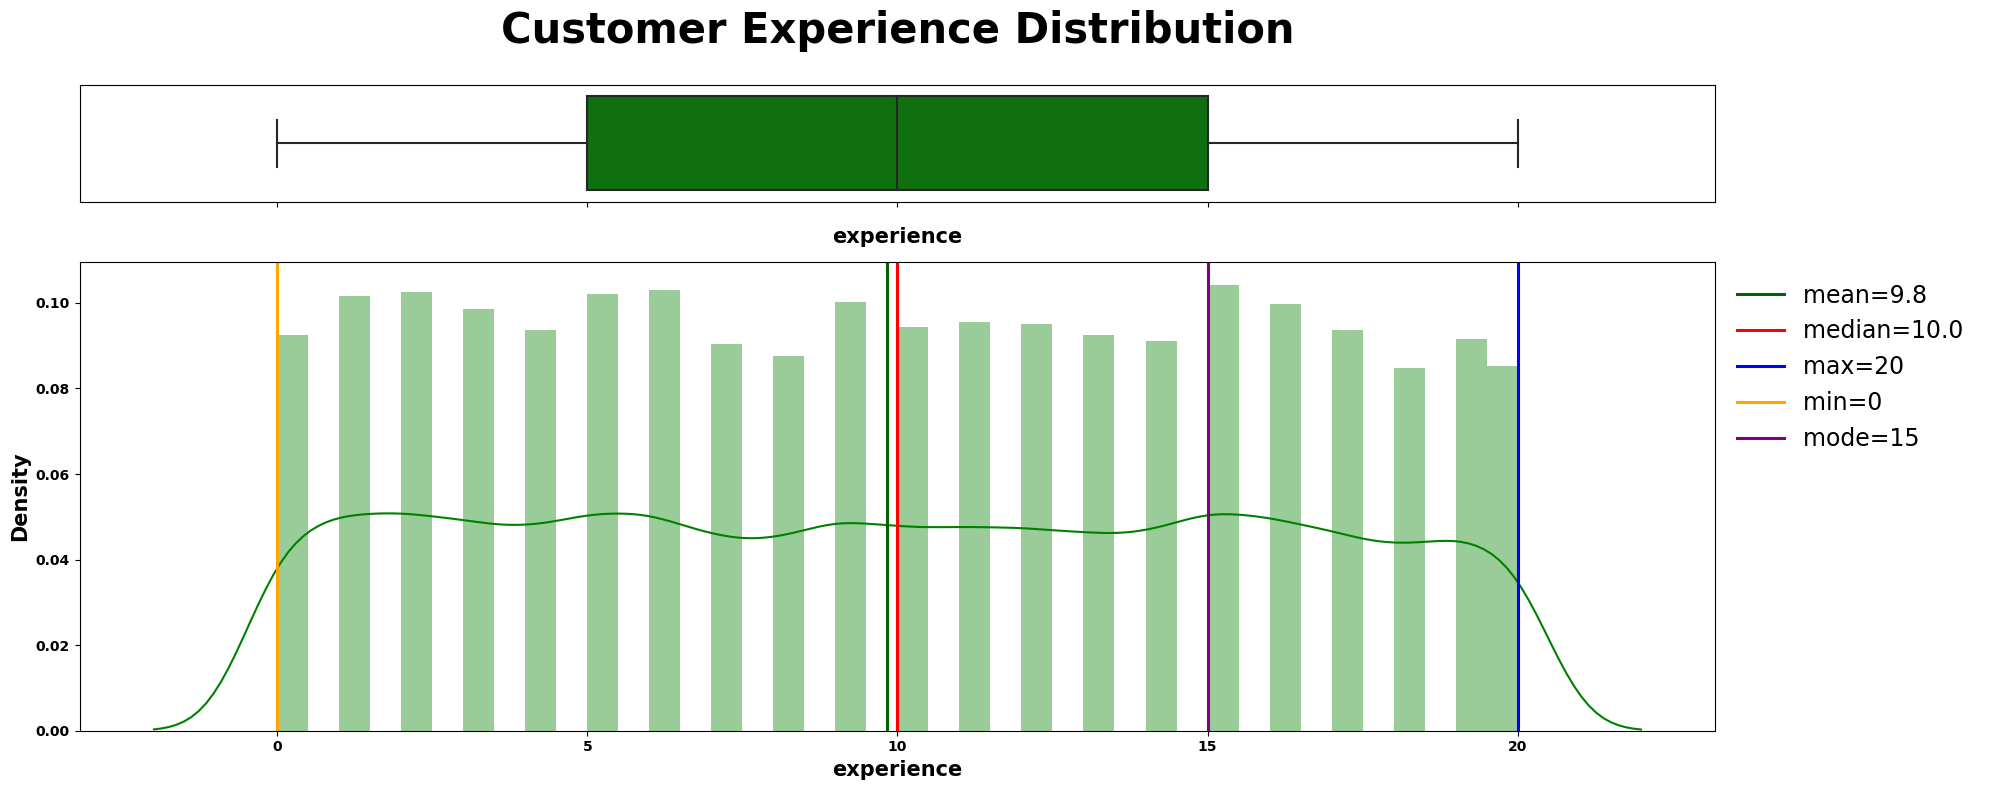

In [ ]:
numerical_plotting(data=loan, col="experience",
                   title="Customer Experience Distribution",
                   symb=" ", ylabel="Density", color="green");

In [ ]:
chebychev(loan.experience, title="Experience",
          interpret=f"at least 75% customer have 0 to 22 years professional experience of working")

-------------------- Interpretation of Experience --------------------
first calc: -2.2
second calc: 21.8
at least 75% customer have 0 to 22 years professional experience of working
----------------------------------------


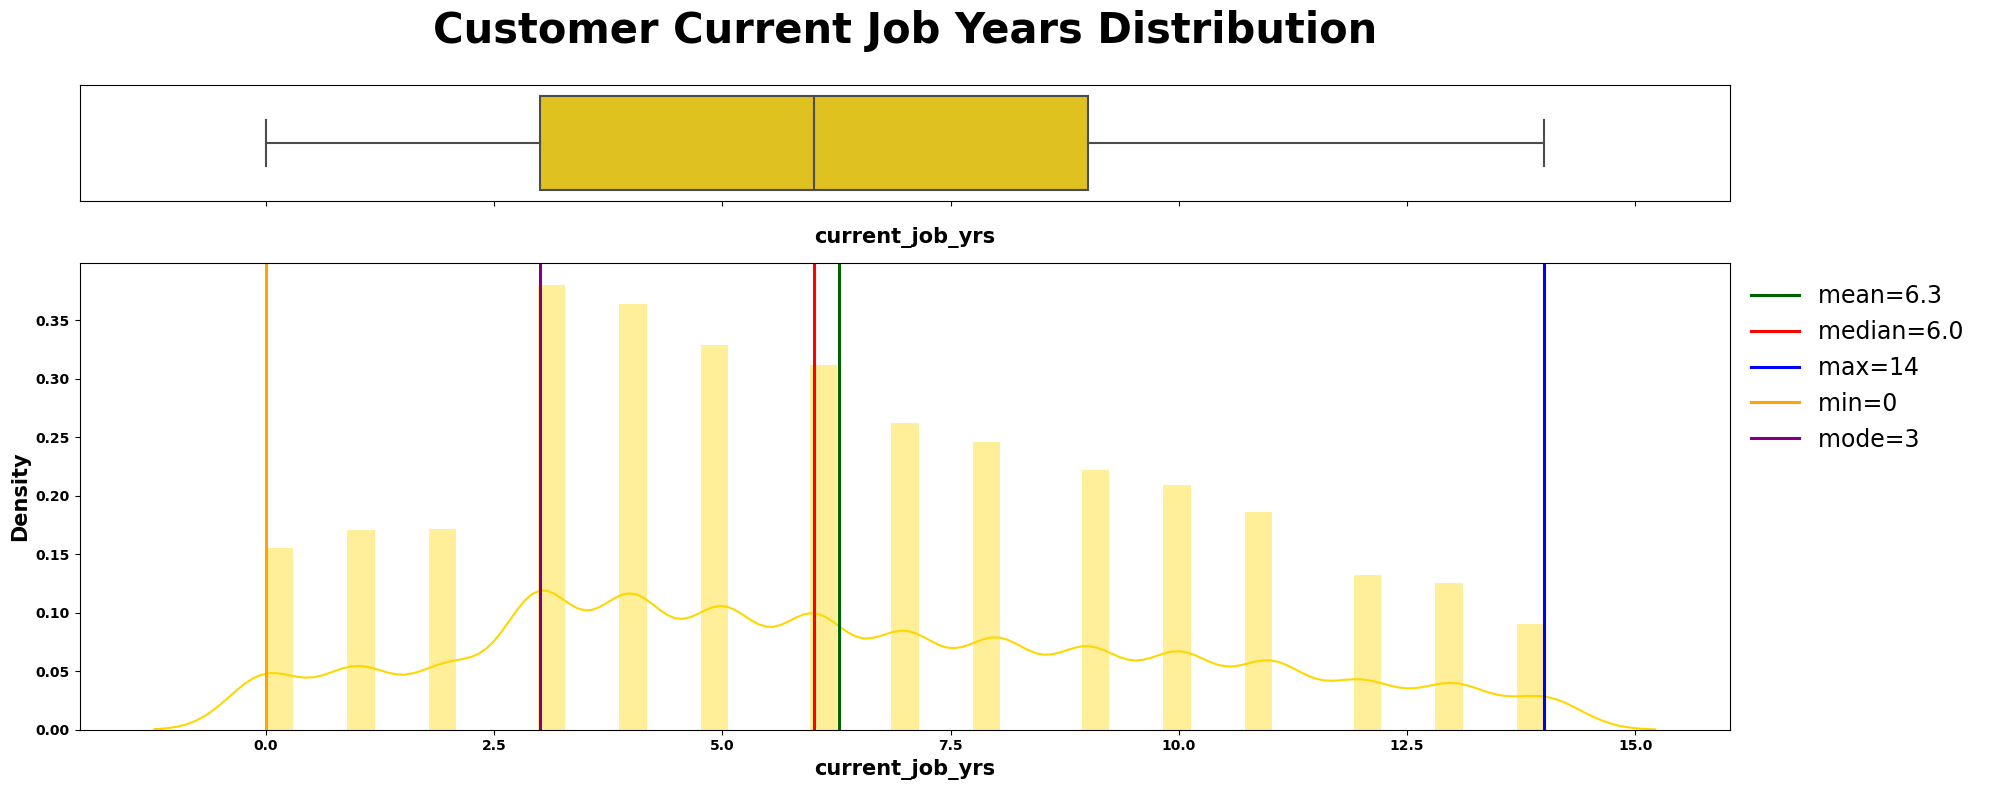

In [ ]:
numerical_plotting(data=loan, col="current_job_yrs",
                   title="Customer Current Job Years Distribution",
                   symb=" ", ylabel="Density", color="gold");

In [ ]:
chebychev(loan.current_job_yrs, title="Current Job Years",
          interpret=f"at least 75% customer have 0 to 13 years of work experience in current job")

-------------------- Interpretation of Current Job Years --------------------
first calc: -1.1
second calc: 13.7
at least 75% customer have 0 to 13 years of work experience in current job
----------------------------------------


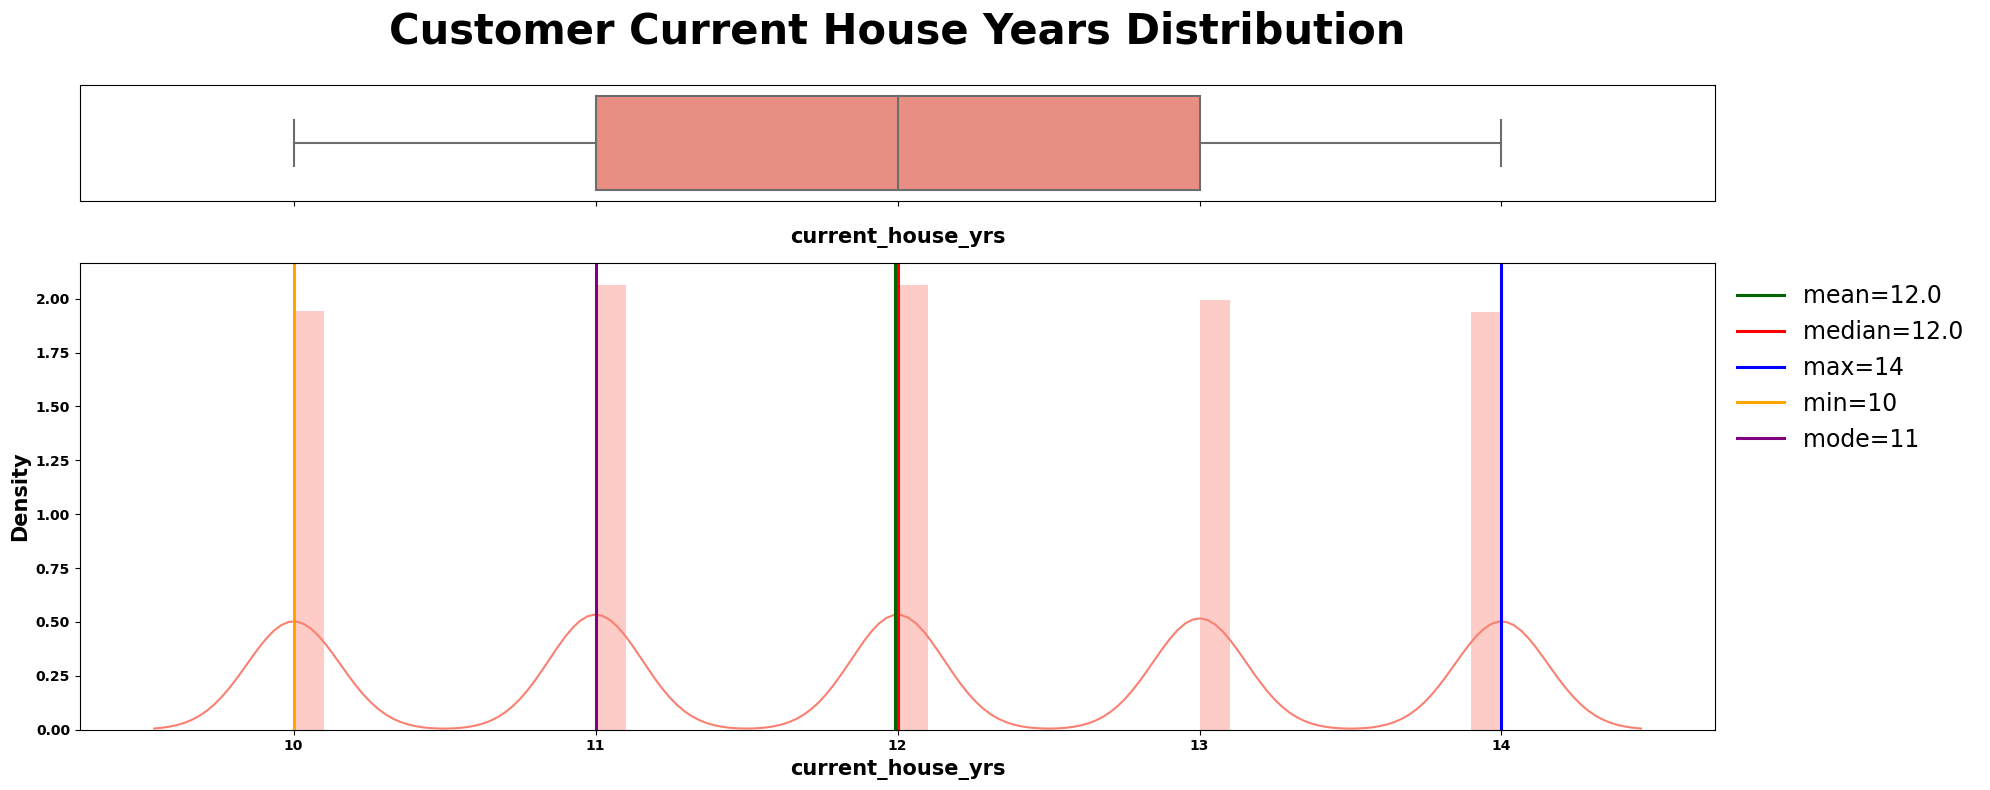

In [ ]:
numerical_plotting(data=loan, col="current_house_yrs",
                   title="Customer Current House Years Distribution",
                   symb=" ", ylabel="Density", color="salmon");

In [ ]:
chebychev(loan.current_house_yrs, title="Current House Years",
          interpret=f"at least 75% customer have lived 9 to 15 years in the current residence")

-------------------- Interpretation of Current House Years --------------------
first calc: 9.2
second calc: 14.8
at least 75% customer have lived 9 to 15 years in the current residence
----------------------------------------


In [ ]:
skew_kurtosis(loan.current_house_yrs, "Skew & Kurtosis Current House Years")

-------------------- Skew & Kurtosis Current House Years --------------------
Skewness: 0.012191317736267481
Approximately symmetric
-----------------------------------
Kurtosis: -1.2747123203924693
The distribution is too flat
-----------------------------------


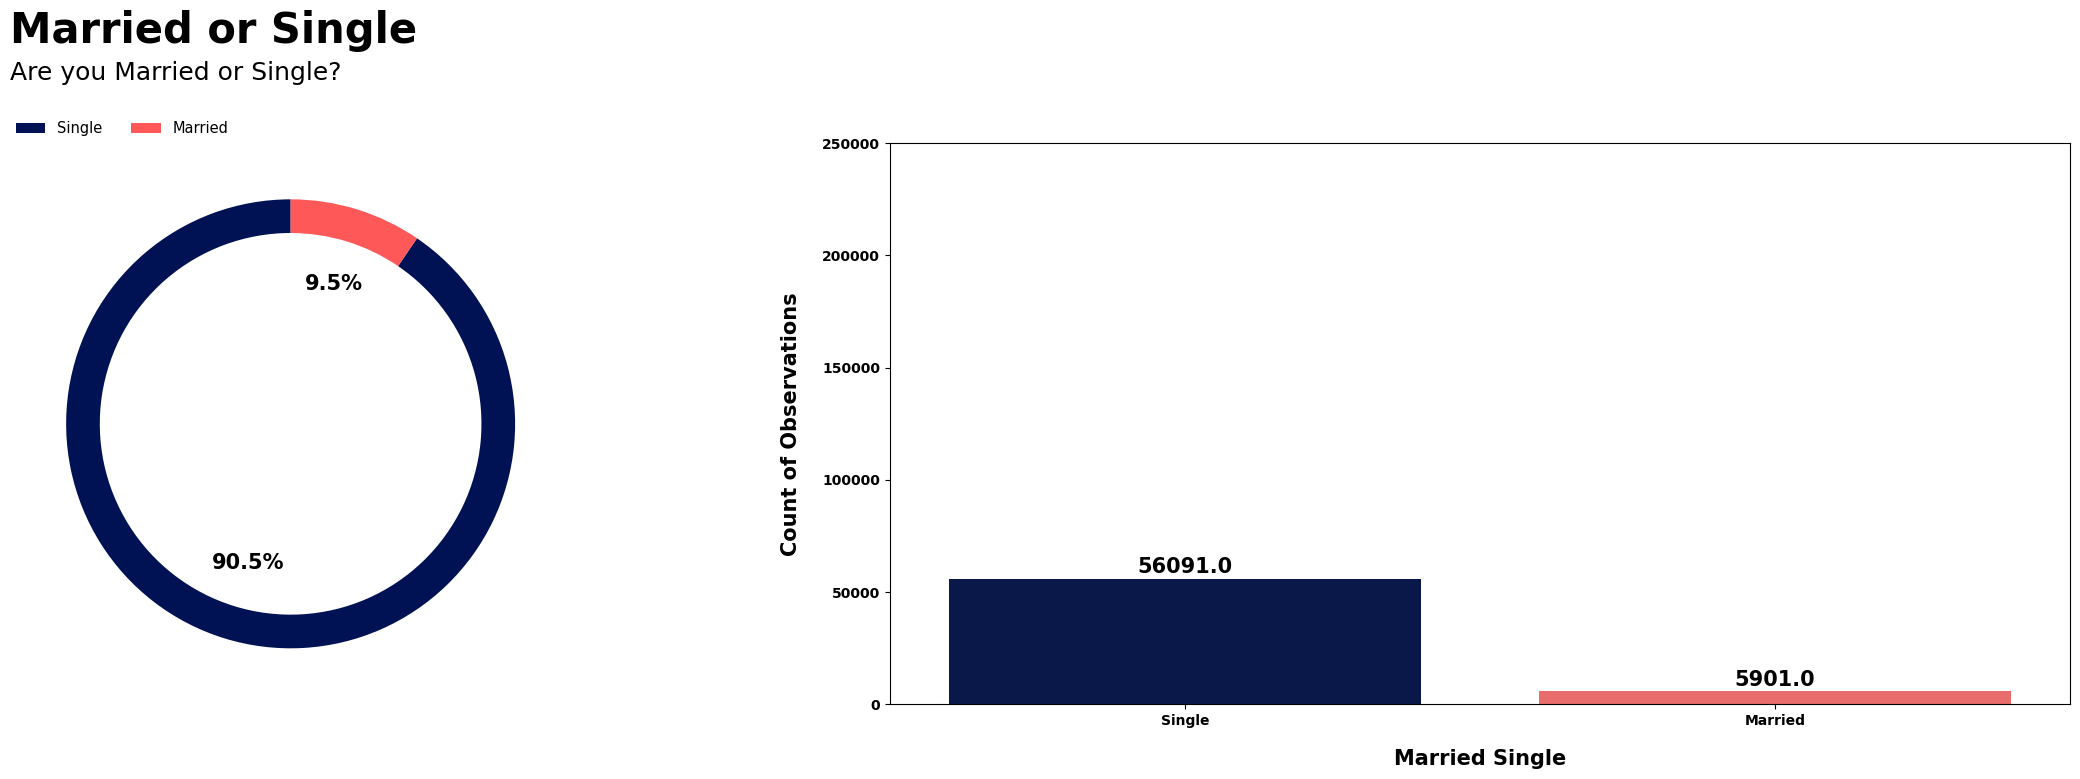

In [ ]:
loan_married_single = loan["married_single"].value_counts()

count_pie_plot(datapie=loan_married_single,
               datacount=loan,
               colcount="married_single",
               colpiey=loan_married_single.values,
               text1="Married or Single",
               pielabels=["Single", "Married"],
               text2="Are you Married or Single?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Married Single",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["Single", "Married"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

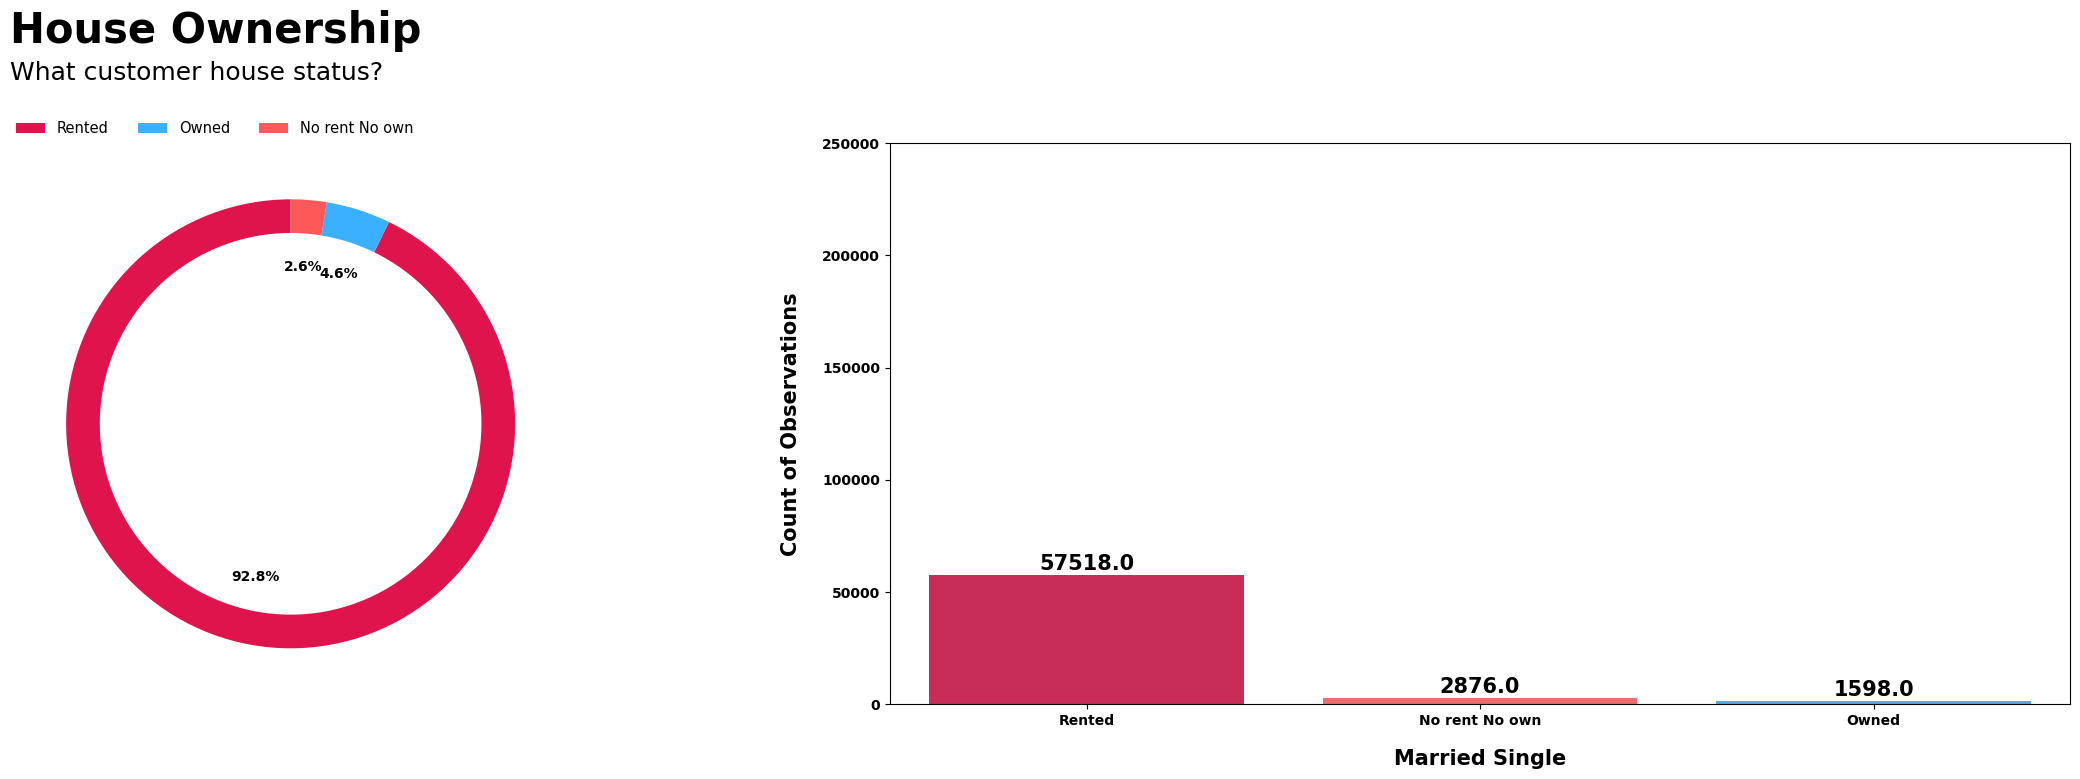

In [ ]:
loan_house_ownership = loan["house_ownership"].value_counts()

count_pie_plot(datapie=loan_house_ownership,
               datacount=loan,
               colcount="house_ownership",
               colpiey=loan_house_ownership.values,
               text1="House Ownership",
               pielabels=["Rented", "Owned", "No rent No own"],
               text2="What customer house status?",
               piecomap=["#E0144C", "#3AB0FF", "#FF5858"],
               countcomap=["#E0144C", "#FF5858", "#3AB0FF"],
               xlabel="Married Single",
               piefs=10,
               yplus=5000,
               pctdistance=0.7,
               ylabel="Count of Observations",
               xticklabel=["Rented", "No rent No own", "Owned"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

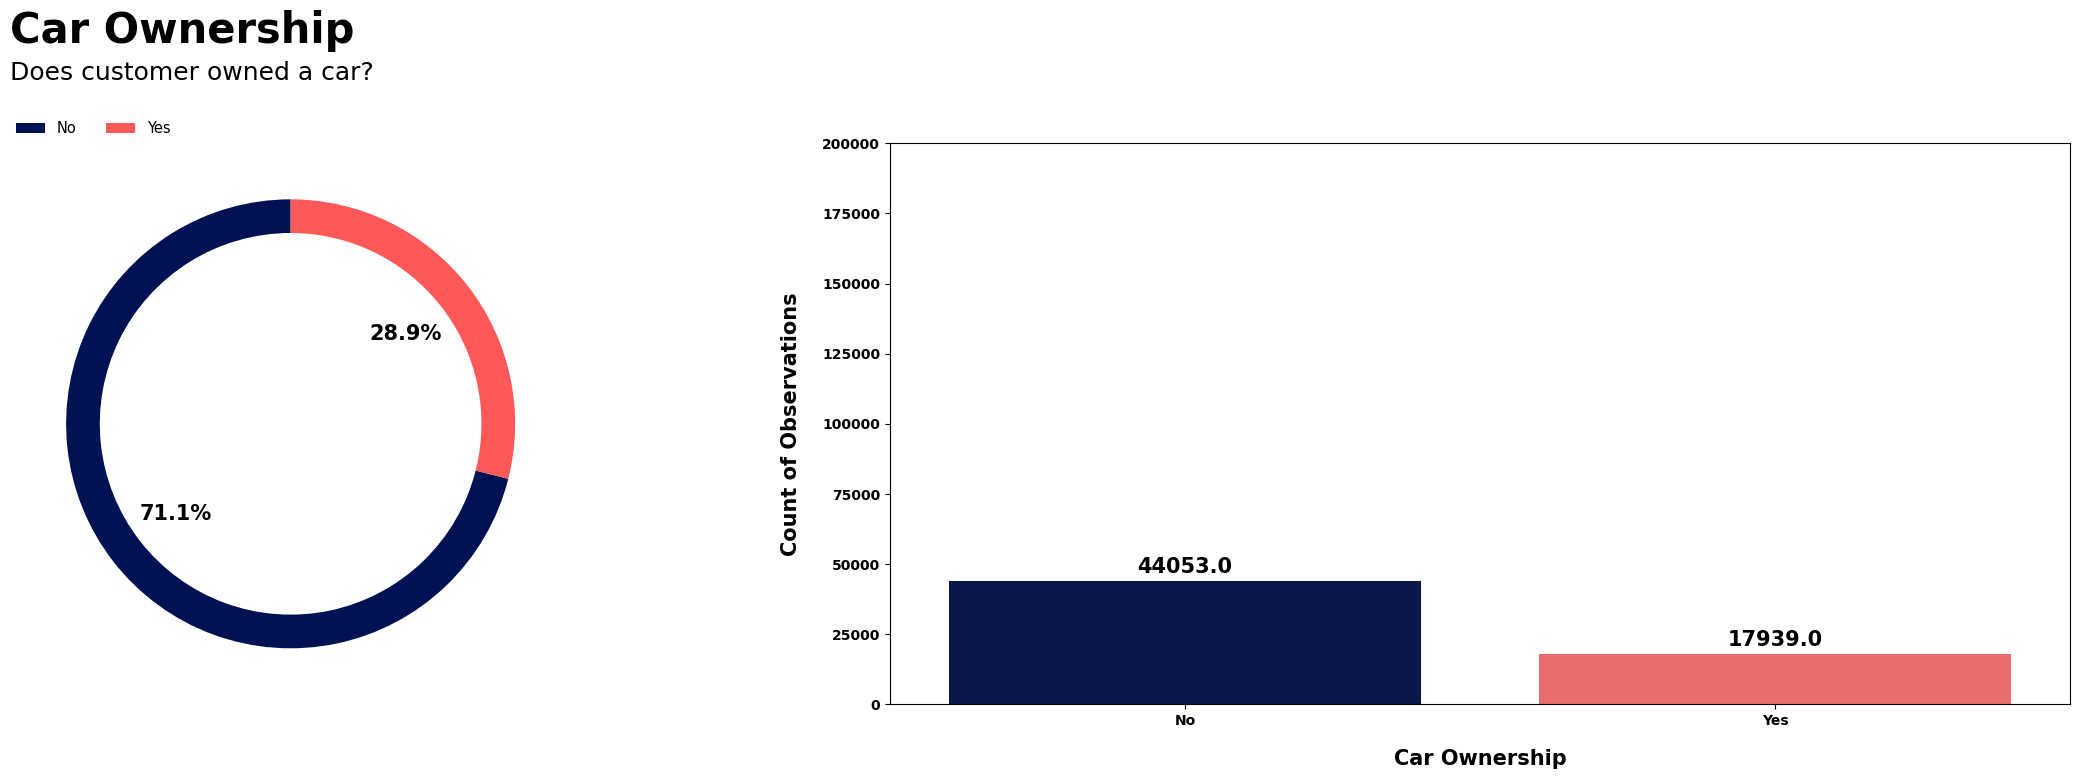

In [ ]:
loan_car_ownership = loan["car_ownership"].value_counts()

count_pie_plot(datapie=loan_car_ownership,
               datacount=loan,
               colcount="car_ownership",
               colpiey=loan_car_ownership.values,
               text1="Car Ownership",
               pielabels=["No", "Yes"],
               text2="Does customer owned a car?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Car Ownership",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["No", "Yes"],
               yticklabel=list(np.arange(0, 225000, 25000)),
               ystart=0,
               yend=200000);

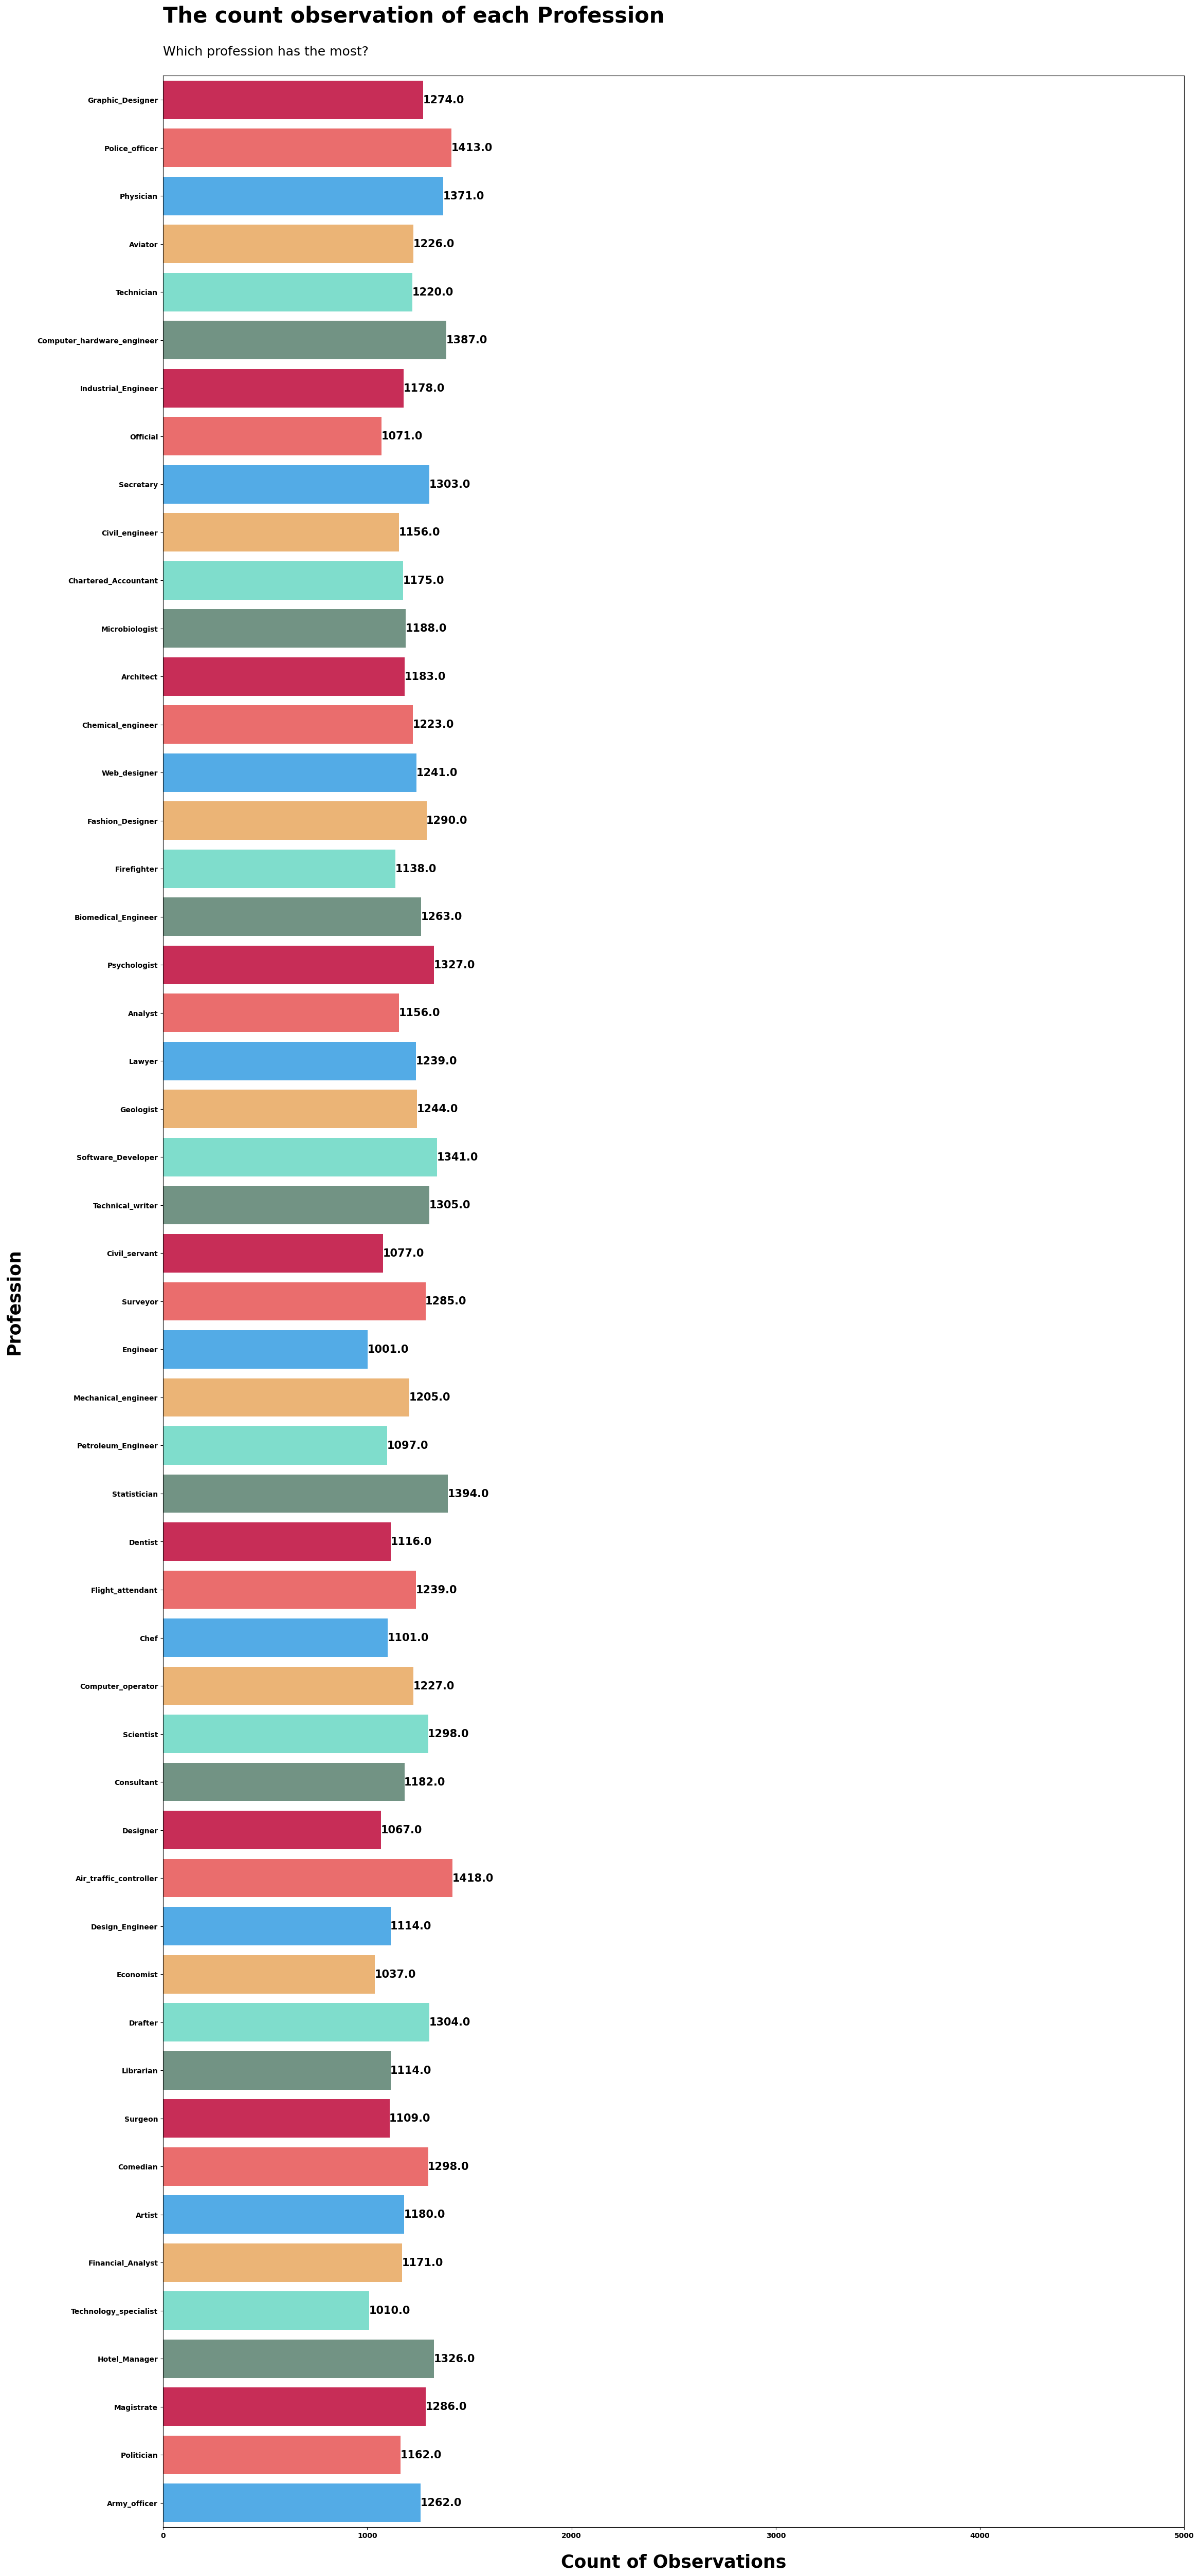

In [ ]:
data = loan
coly = "profession"
sizey = 50
text1 = "The count observation of each Profession"
text2 = "Which profession has the most?"
xlabel = "Count of Observations"
ylabel = "Profession"
xstart, xend = 0, 5000
xplus = 100
ytimes1, ytimes2 = 3.5, 2

countplot_y(data=data, coly=coly, sizey=sizey, xplus=xplus,
            text1=text1, text2=text2, xlabel=xlabel, ytimes1=ytimes1,
            ytimes2=ytimes2, ylabel=ylabel, xstart=xstart, xend=xend);

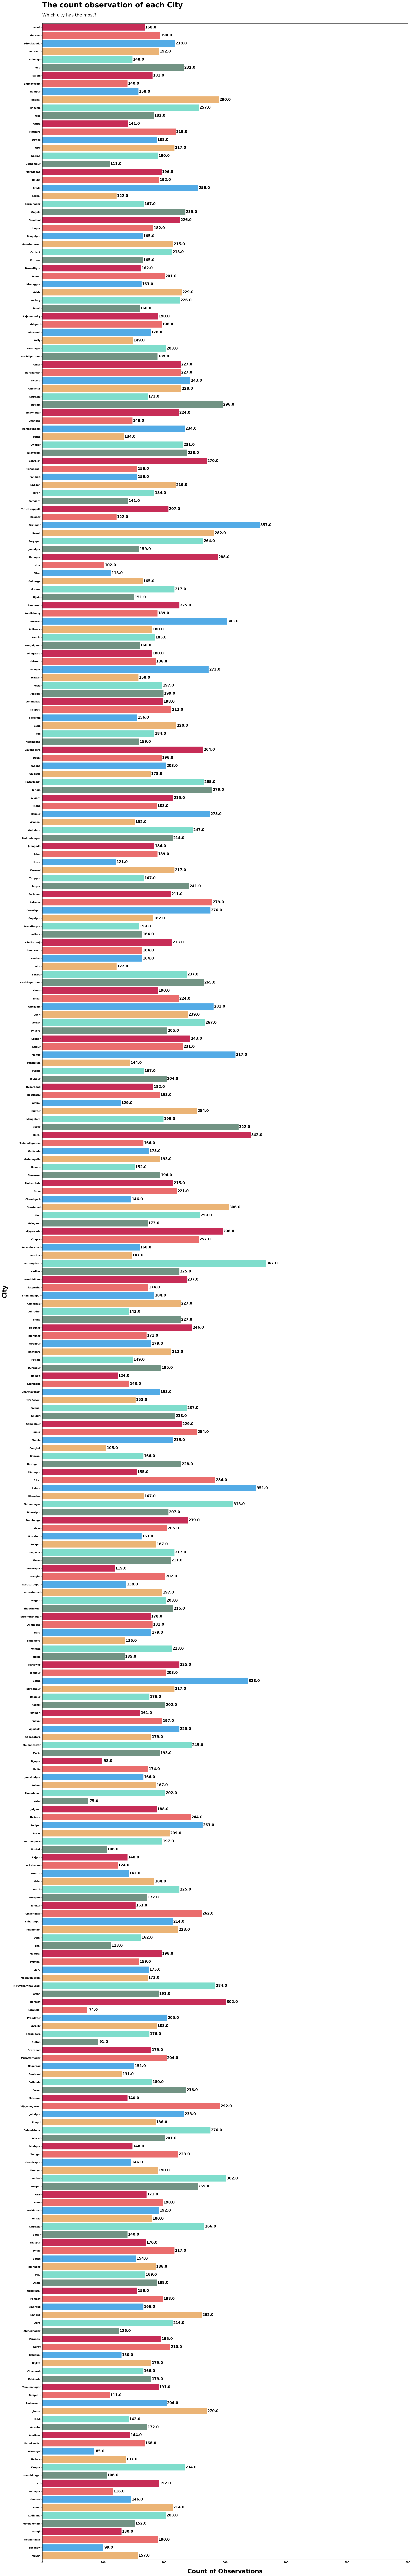

In [ ]:
data = loan
coly = "city"
sizey = 150
text1 = "The count observation of each City"
text2 = "Which city has the most?"
xlabel = "Count of Observations"
ylabel = "City"
xstart, xend = 0, 600
xplus = 10
ytimes1, ytimes2 = 5.5, 3

countplot_y(data=data, coly=coly, sizey=sizey, xplus=xplus,
            text1=text1, text2=text2, xlabel=xlabel, ytimes1=ytimes1,
            ytimes2=ytimes2, ylabel=ylabel, xstart=xstart, xend=xend);

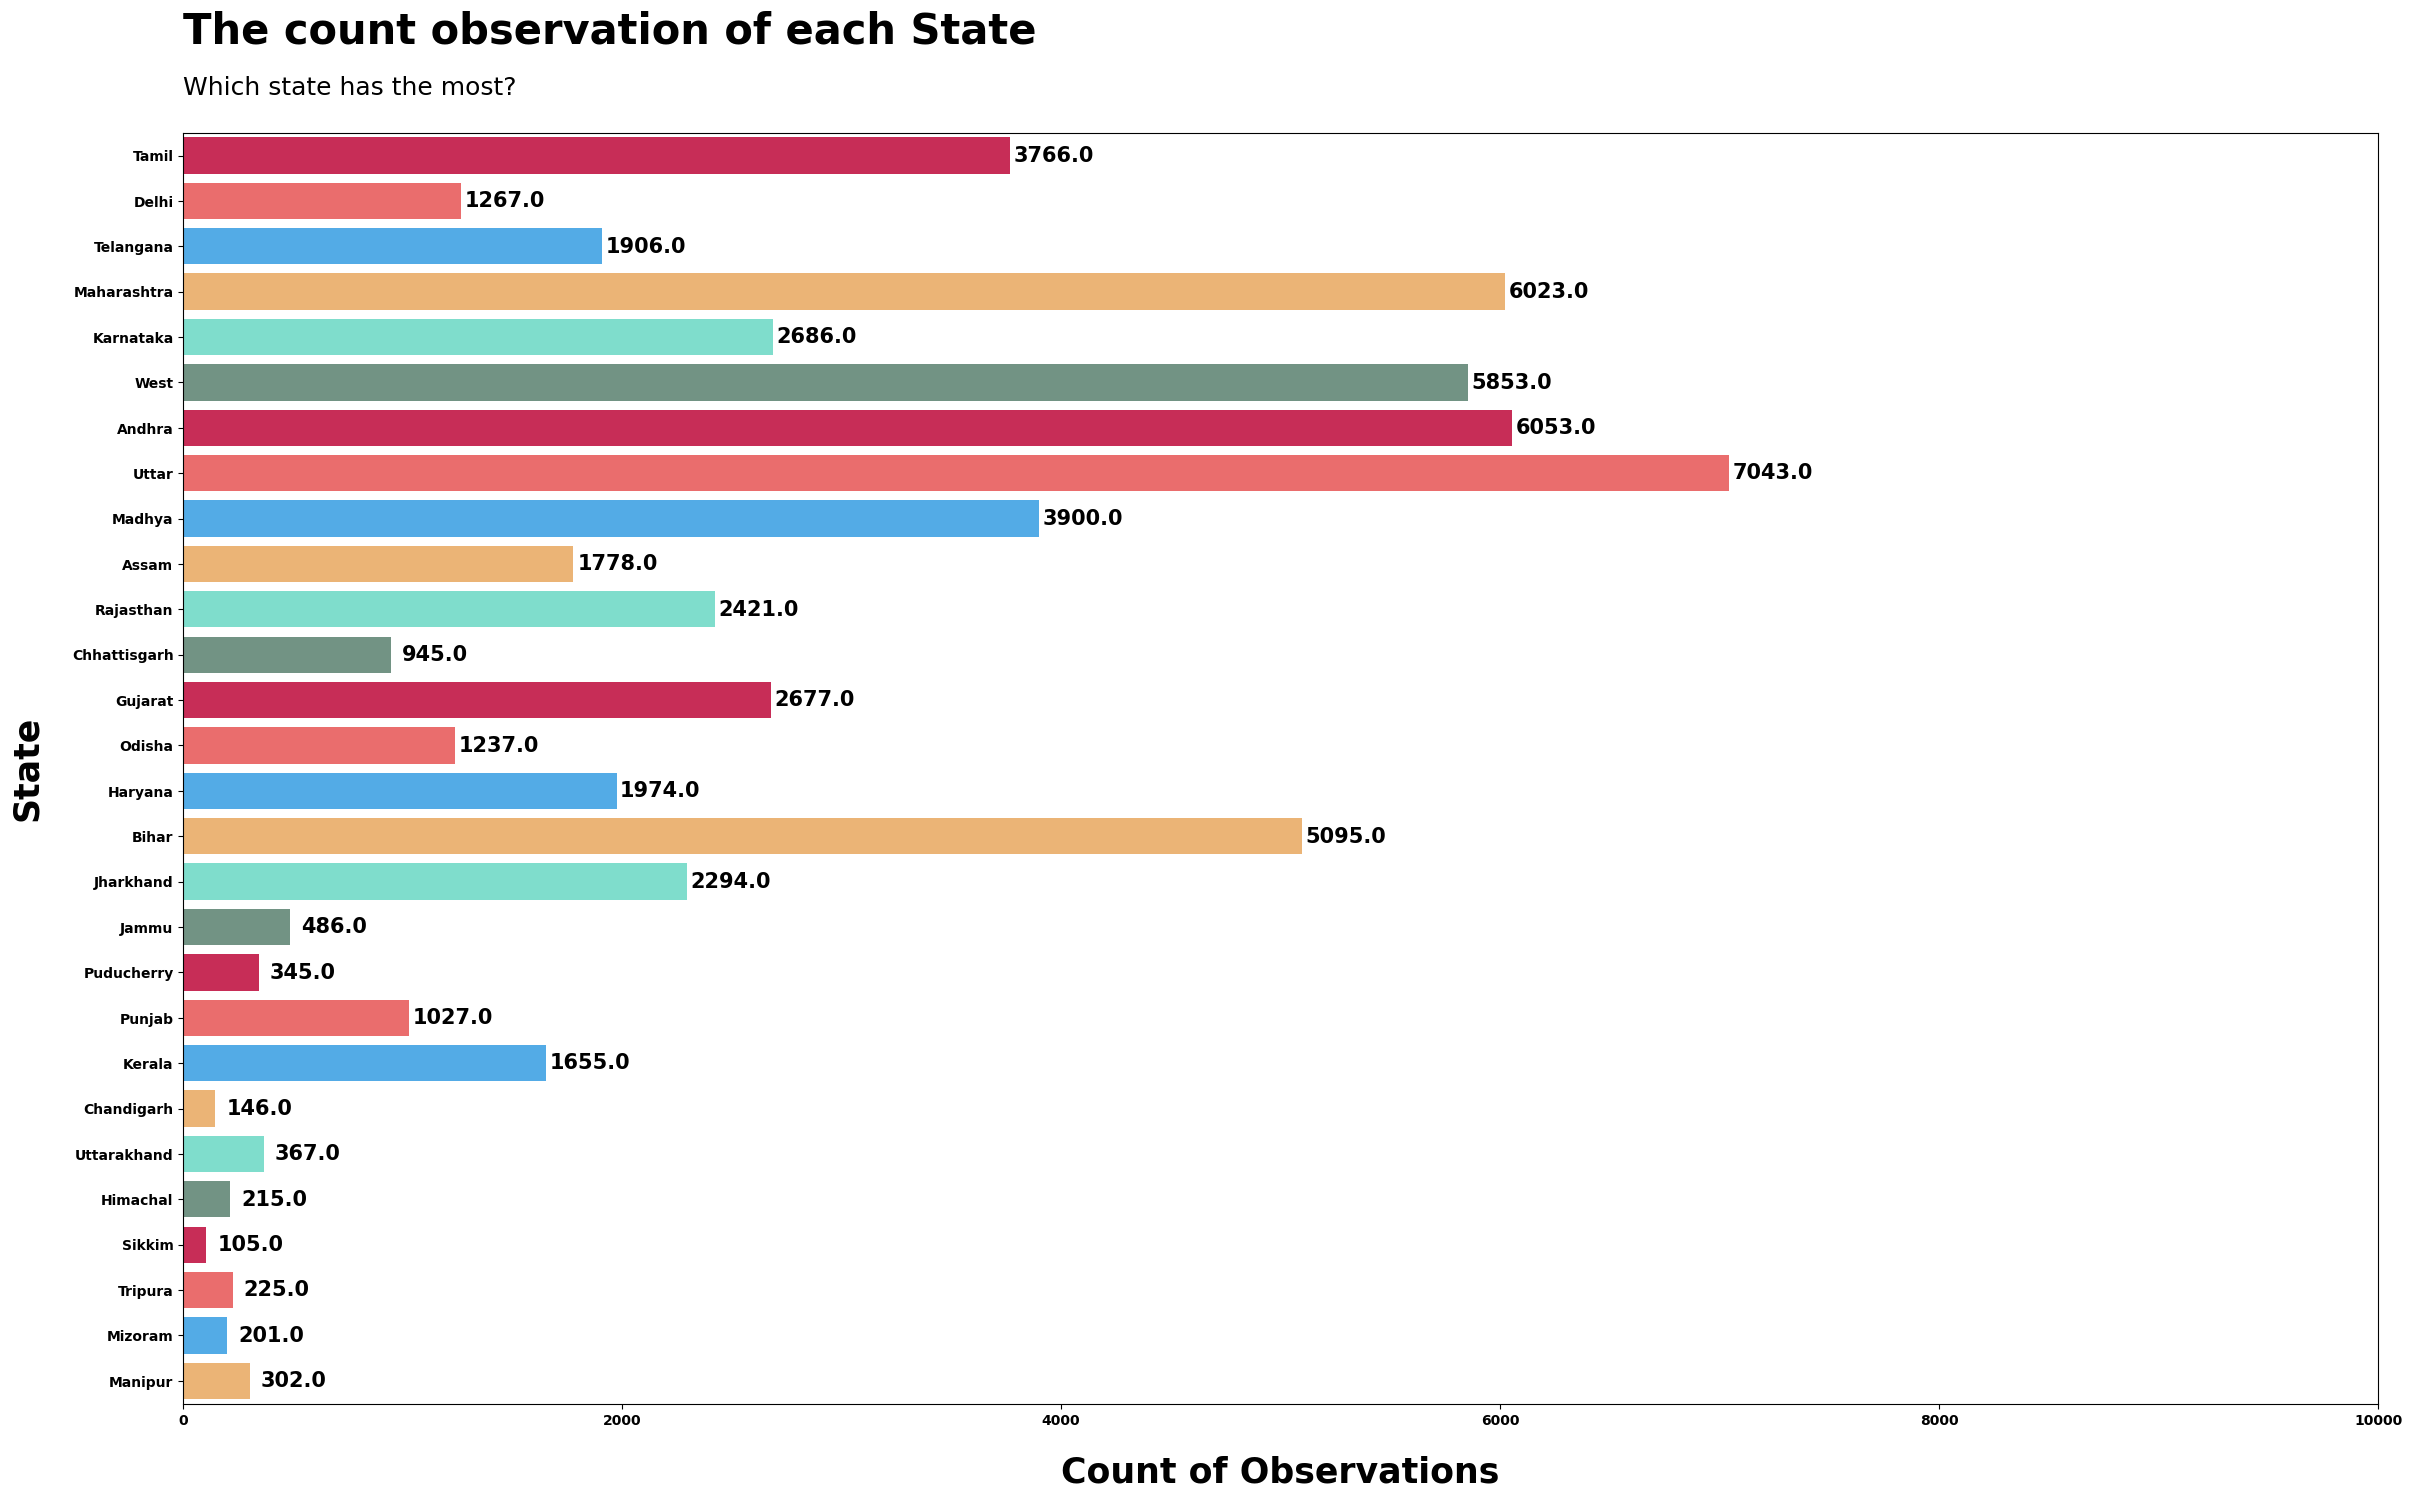

In [ ]:
data = loan
coly = "state"
sizey = 15
text1 = "The count observation of each State"
text2 = "Which state has the most?"
xlabel = "Count of Observations"
ylabel = "State"
xstart, xend = 0, 10000
xplus = 200
ytimes1, ytimes2 = 5.5, 3

countplot_y(data=data, coly=coly, sizey=sizey, xplus=xplus,
            text1=text1, text2=text2, xlabel=xlabel, ytimes1=ytimes1,
            ytimes2=ytimes2, ylabel=ylabel, xstart=xstart, xend=xend);

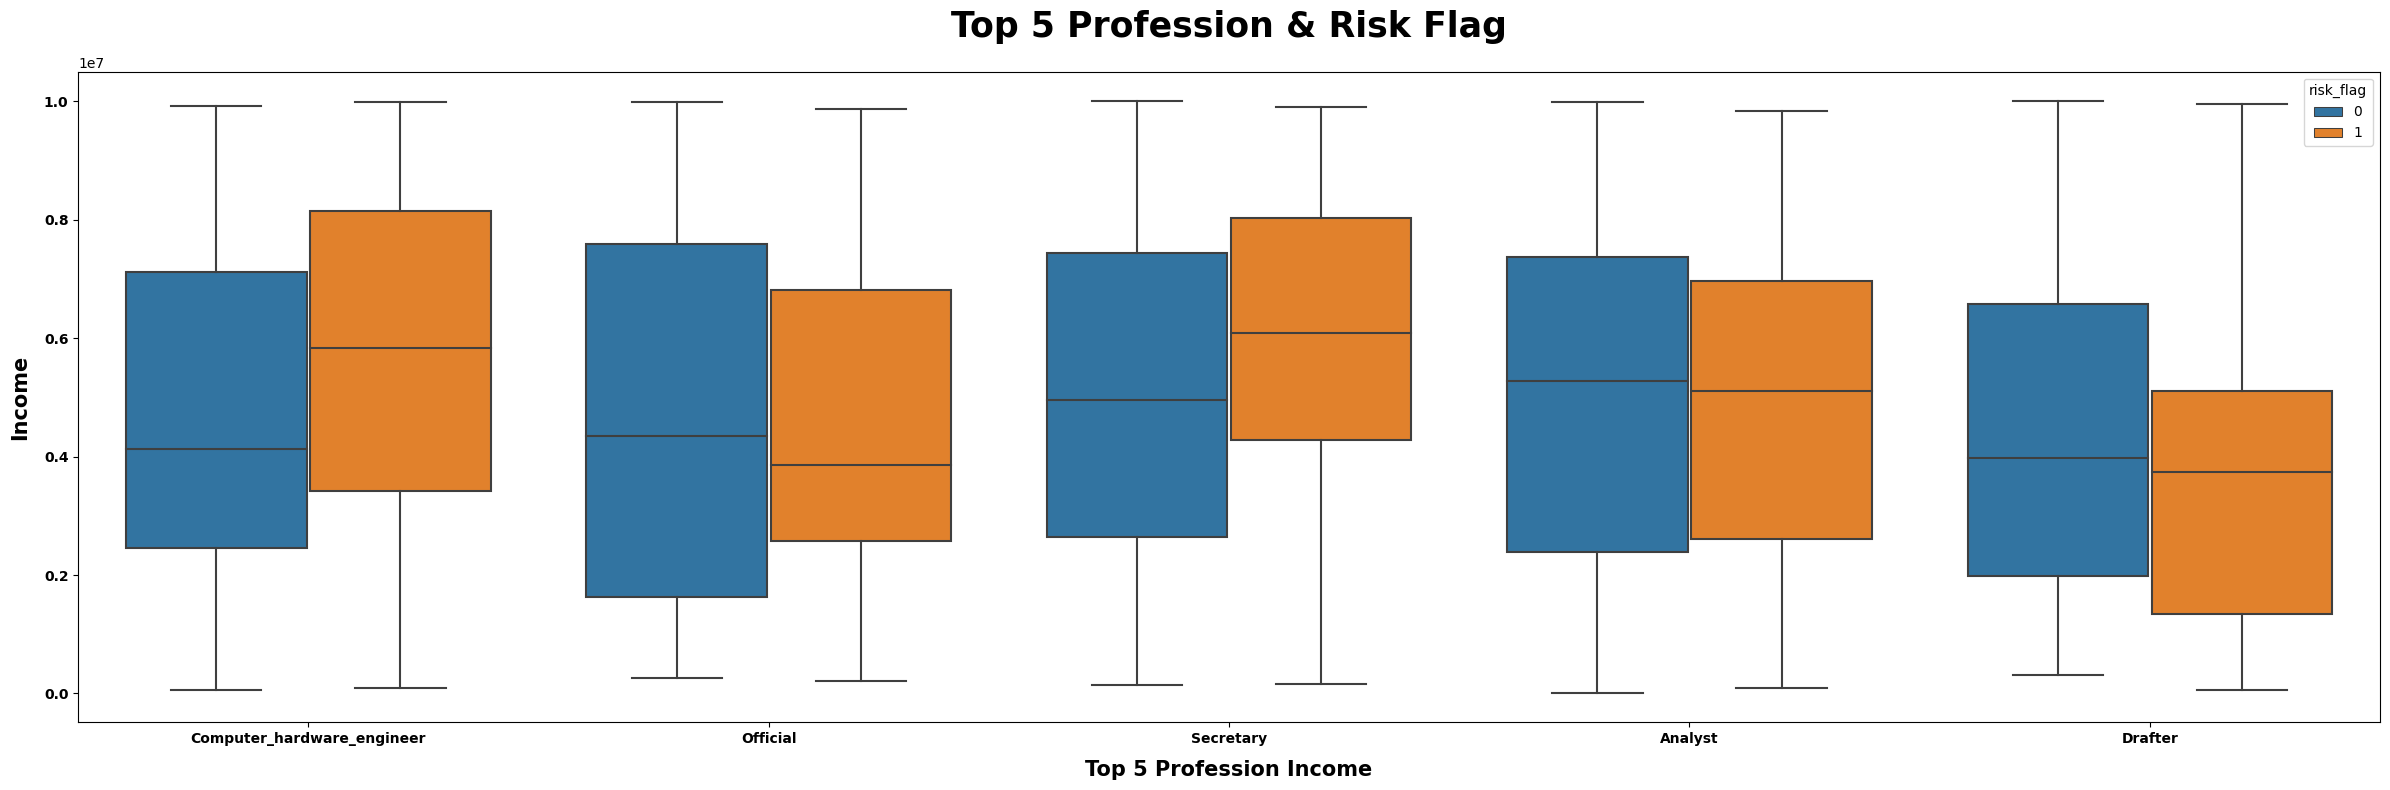

In [ ]:
I = (loan.loc[loan["profession"]
         .isin(["Drafter", "Secretary", "Computer_hardware_engineer", "Analyst", "Official"])]
         .loc[:, ["income", "profession", "risk_flag"]])

data = I
title = "Top 5 Profession & Risk Flag"
x = "profession"
y = "income"
hue = "risk_flag"
xlabel = "Top 5 Profession Income"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y,
           hue=hue, xlabel=xlabel, ylabel=ylabel);

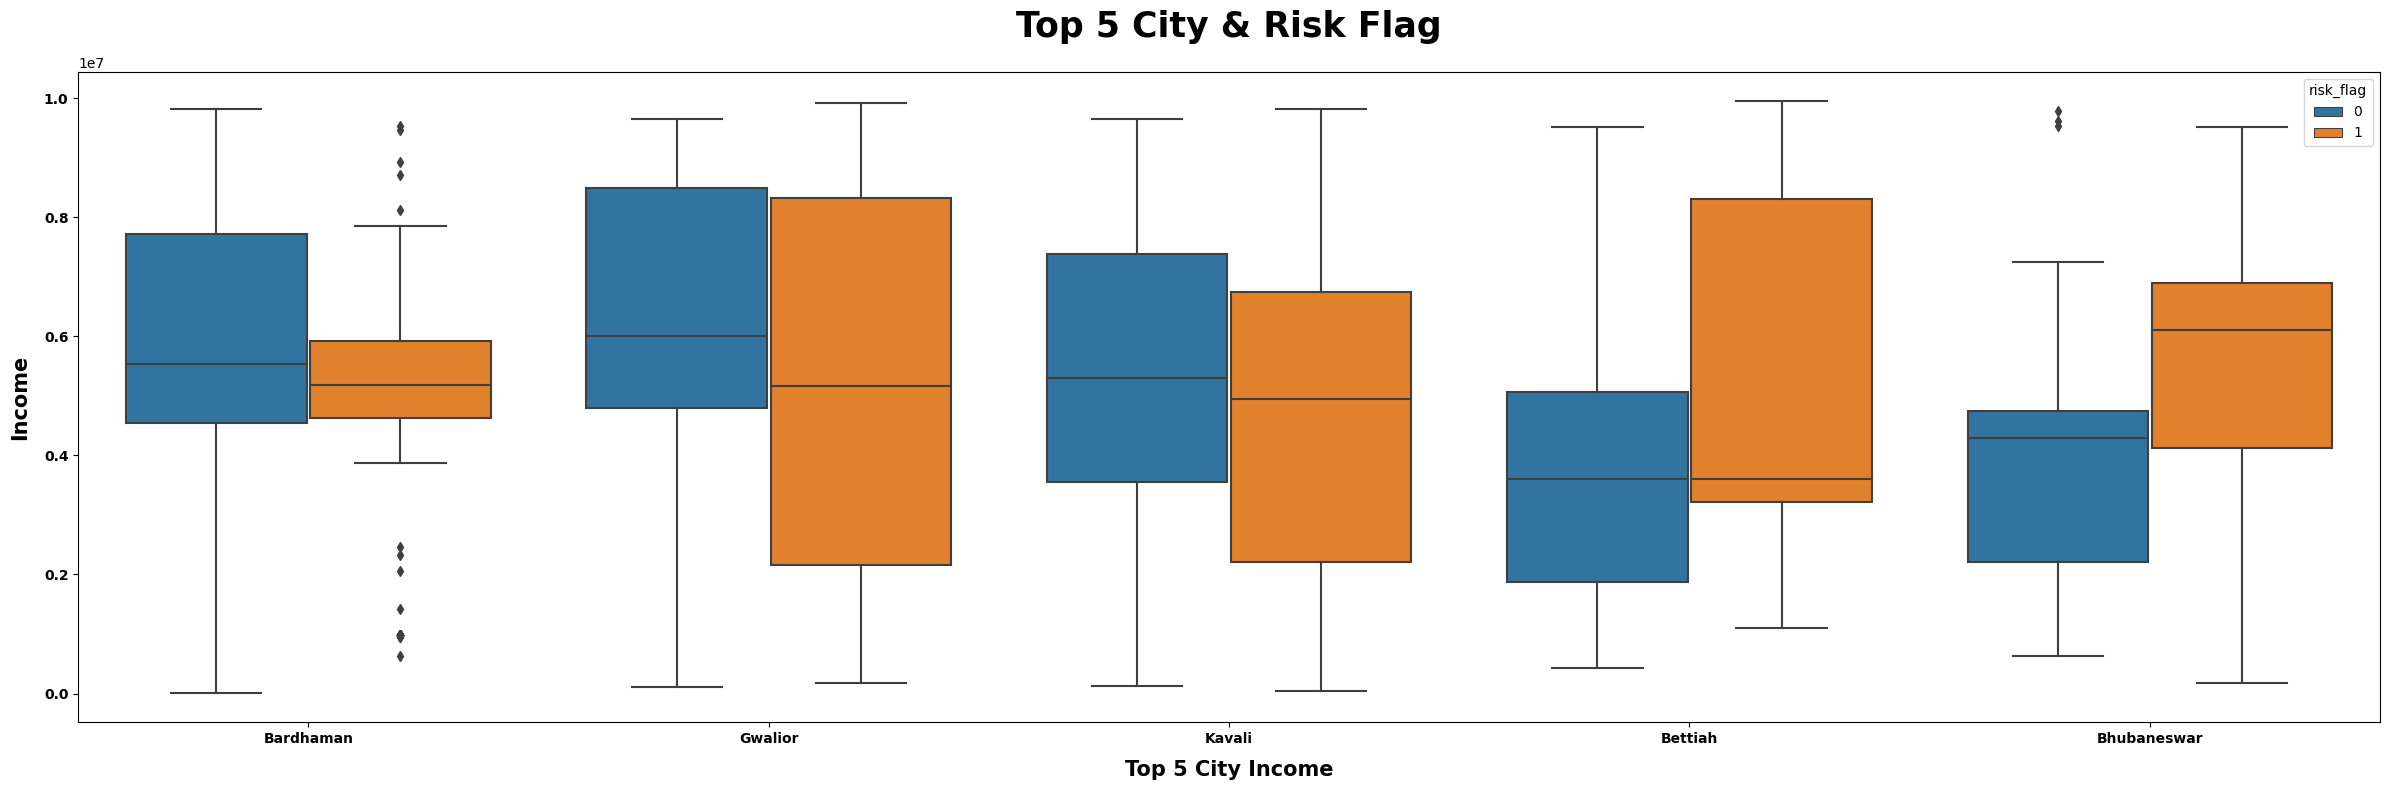

In [ ]:
C = (loan.loc[loan["city"]
         .isin(["Bhubaneswar", "Bettiah", "Gwalior", "Kavali","Bardhaman"])]
         .loc[:, ["income", "city", "risk_flag"]])

data = C
title = "Top 5 City & Risk Flag"
x = "city"
y = "income"
hue = "risk_flag"
xlabel = "Top 5 City Income"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y,
           hue=hue, xlabel=xlabel, ylabel=ylabel);

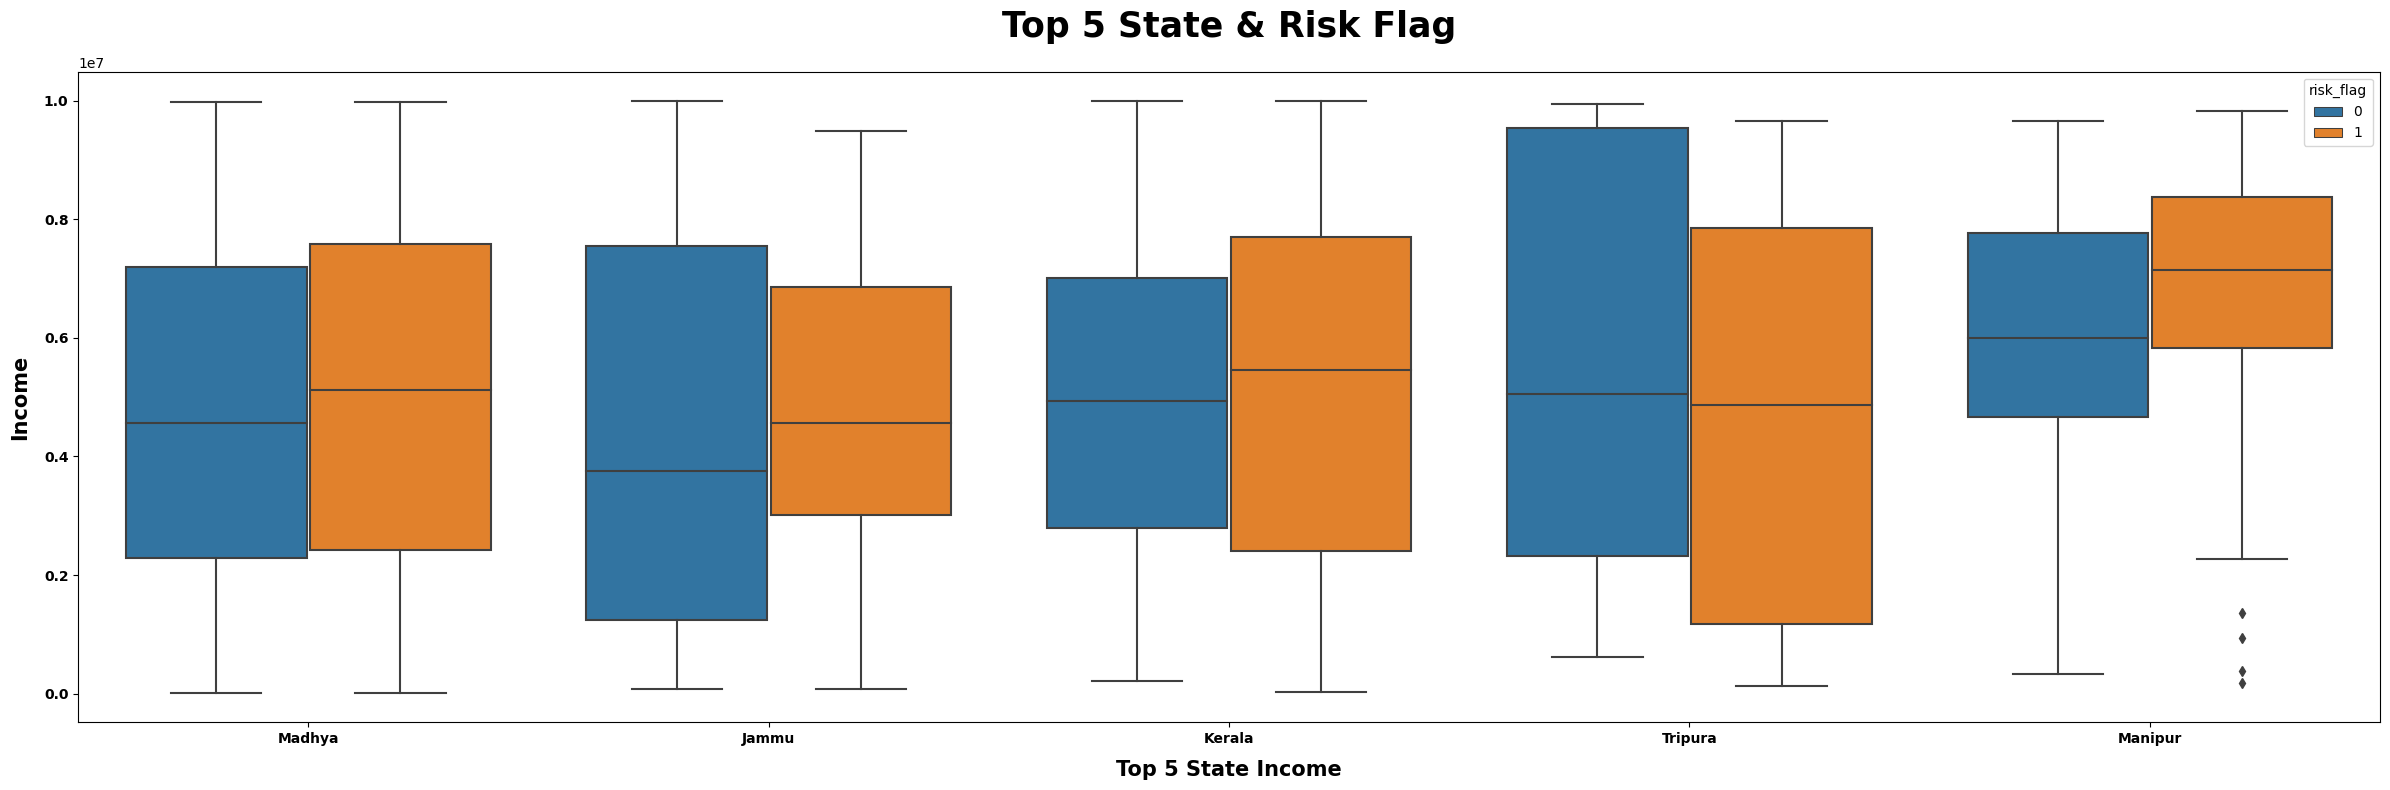

In [ ]:
S = (loan.loc[loan["state"]
         .isin(["Manipur", "Kerala", "Tripura", "Madhya", "Jammu"])]
         .loc[:, ["income", "state", "risk_flag"]])

data = S
title = "Top 5 State & Risk Flag"
x = "state"
y = "income"
hue = "risk_flag"
xlabel = "Top 5 State Income"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y,
           hue=hue, xlabel=xlabel, ylabel=ylabel);

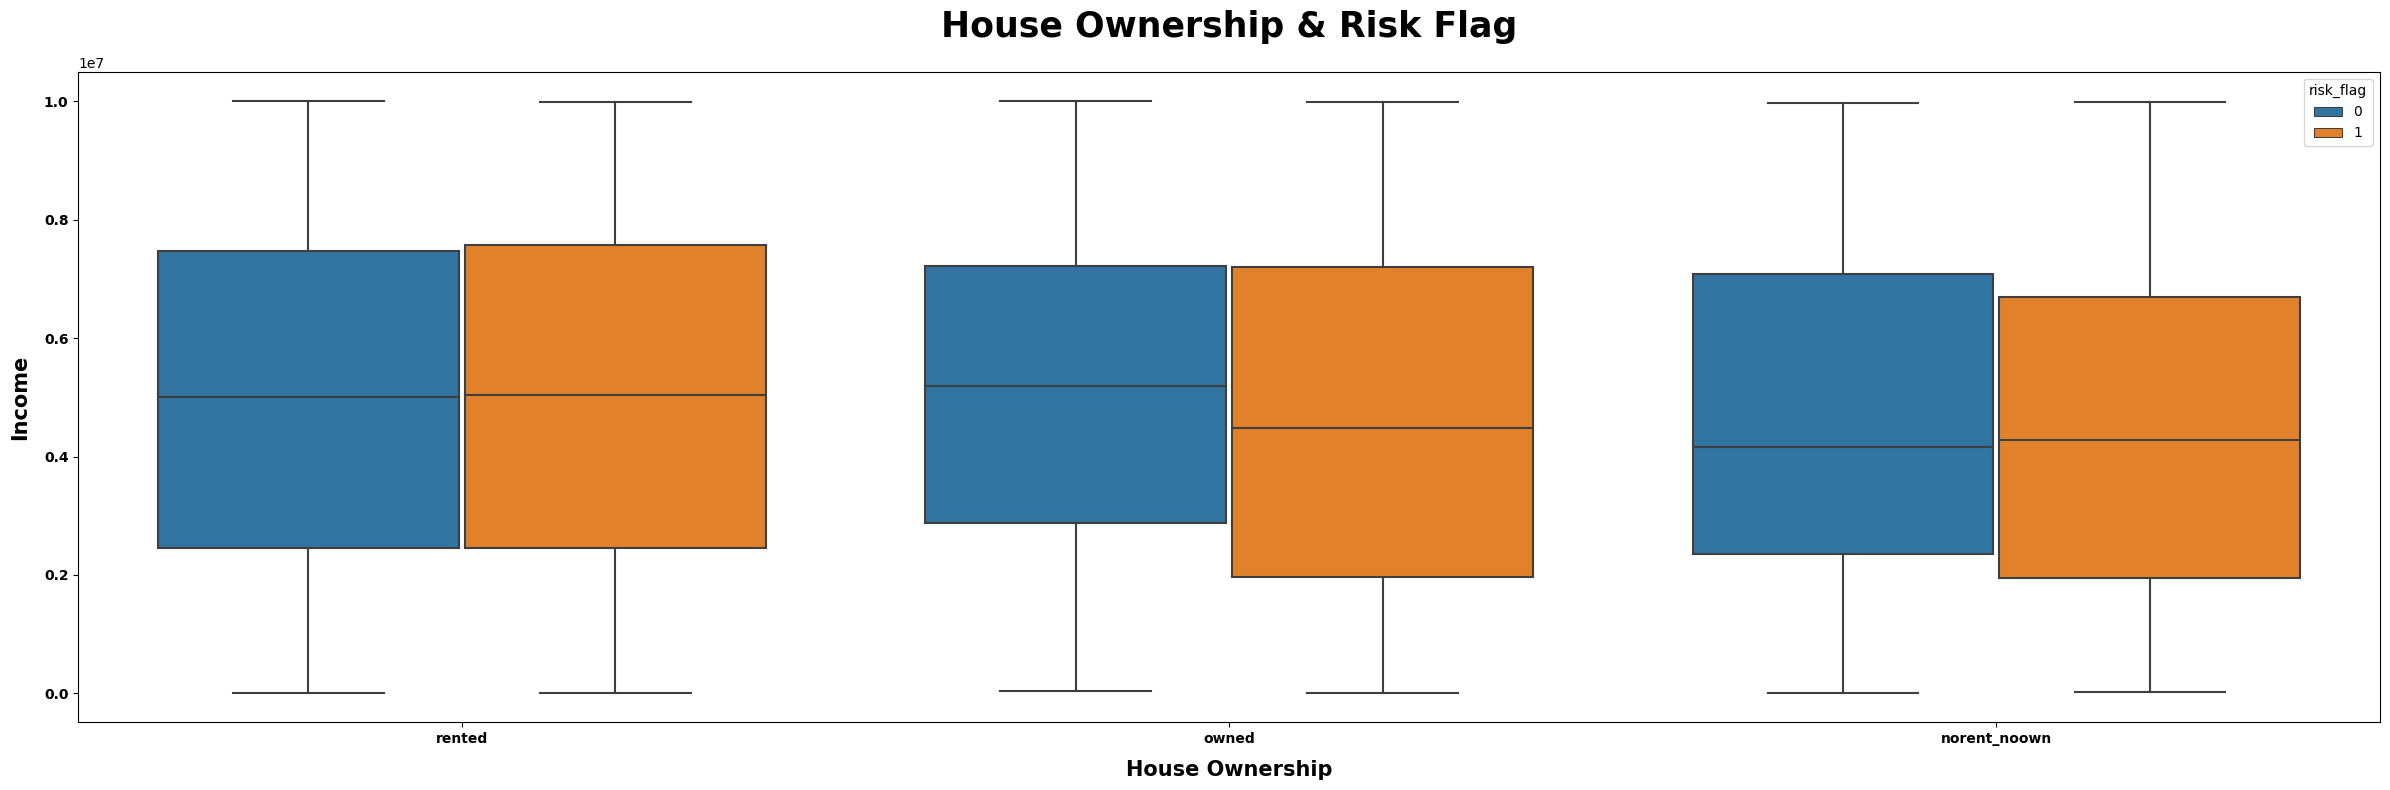

In [ ]:
H = (loan.loc[loan["house_ownership"]
         .isin(["rented", "owned", "norent_noown"])]
         .loc[:, ["income", "house_ownership", "risk_flag"]])

data = H
title = "House Ownership & Risk Flag"
x = "house_ownership"
y = "income"
hue = "risk_flag"
xlabel = "House Ownership"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y,
           hue=hue, xlabel=xlabel, ylabel=ylabel);

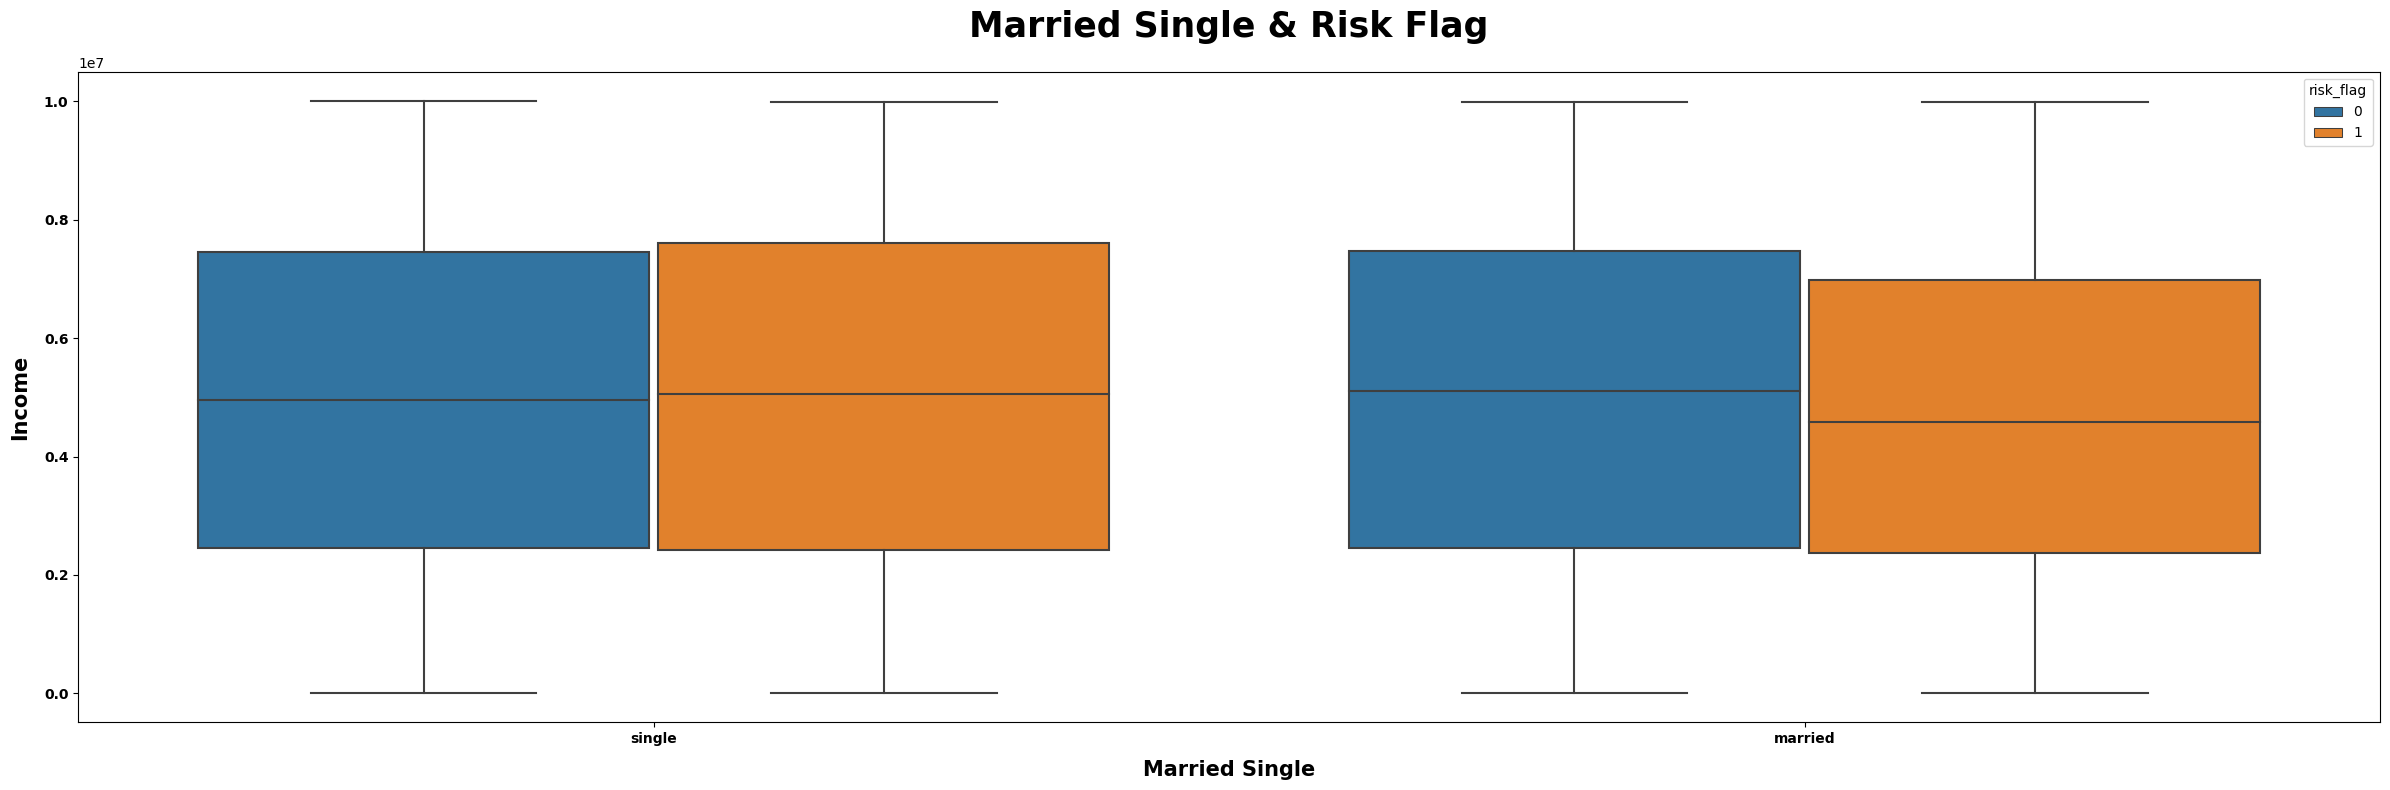

In [ ]:
M = (loan.loc[loan["married_single"]
         .isin(["single", "married"])]
         .loc[:, ["income", "married_single", "risk_flag"]])

data = M
title = "Married Single & Risk Flag"
x = "married_single"
y = "income"
hue = "risk_flag"
xlabel = "Married Single"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y,
           hue=hue, xlabel=xlabel, ylabel=ylabel);

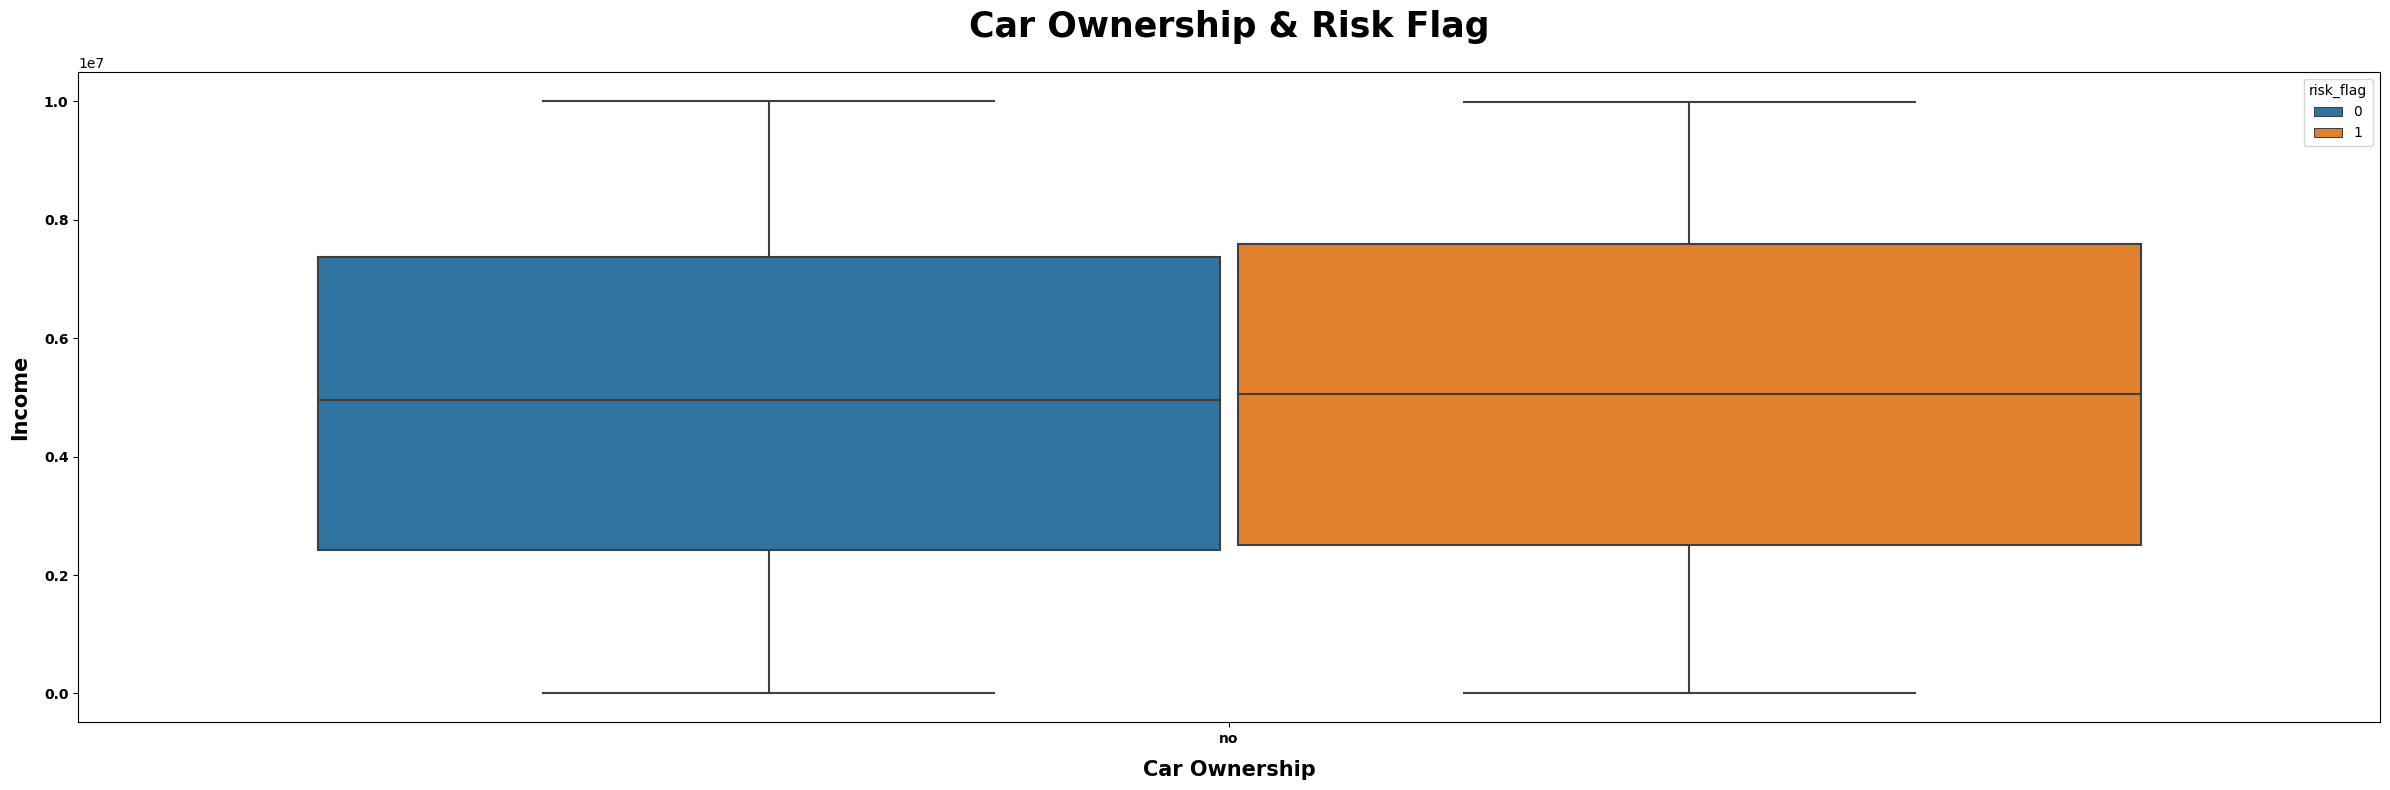

In [ ]:
CO = (loan.loc[loan["car_ownership"]
          .isin(["no", "single"])]
          .loc[:, ["income", "car_ownership", "risk_flag"]])

data = CO
title = "Car Ownership & Risk Flag"
x = "car_ownership"
y = "income"
hue = "risk_flag"
xlabel = "Car Ownership"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y,
           hue=hue, xlabel=xlabel, ylabel=ylabel);

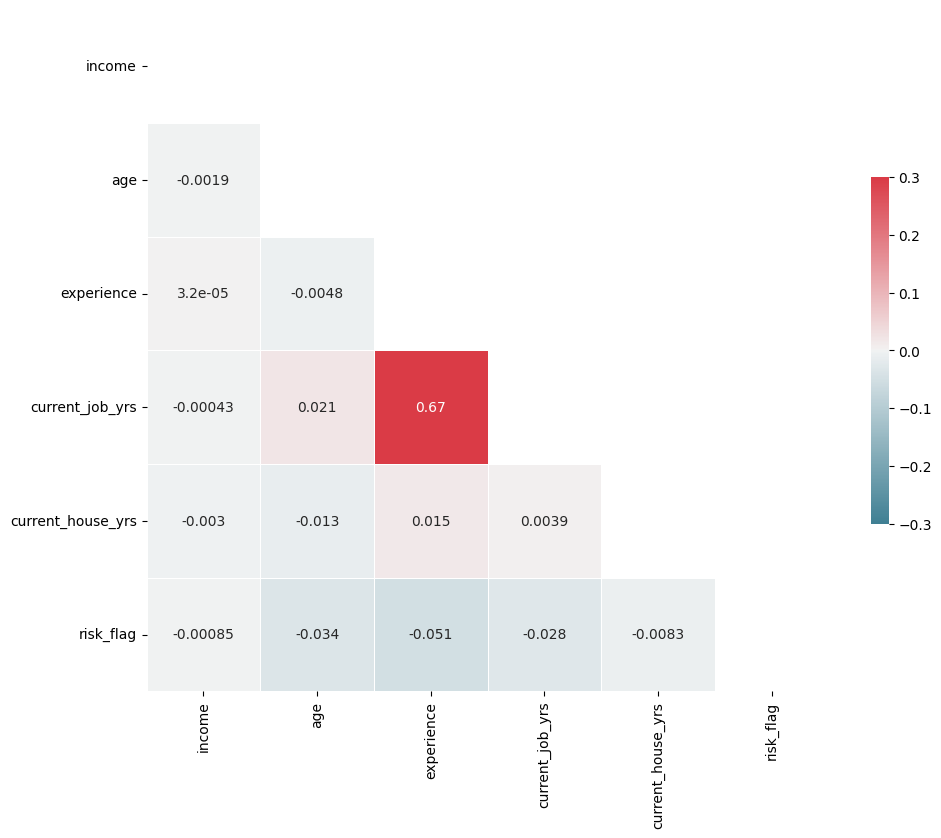

In [ ]:
# Create the correlation matrix
corr = loan.corr()

# Generate mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ration
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.3,
            vmin=-.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5});

In [ ]:
corr.style.background_gradient(cmap=cmap)

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
income,1.000000,-0.001918,0.000032,-0.000426,-0.002952,-0.000848
age,-0.001918,1.000000,-0.004829,0.020973,-0.013222,-0.034340
experience,0.000032,-0.004829,1.000000,0.667731,0.015365,-0.051078
current_job_yrs,-0.000426,0.020973,0.667731,1.000000,0.003924,-0.028455
current_house_yrs,-0.002952,-0.013222,0.015365,0.003924,1.000000,-0.008288
risk_flag,-0.000848,-0.034340,-0.051078,-0.028455,-0.008288,1.000000


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# define column has type Object to implement LabelEncoder
list_object = loan.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    loan[col] = encoder.fit_transform(loan[col].values.tolist())

In [ ]:
# getting the Mutual Information about the data
X_mutual = loan.astype("int64").reset_index().copy()
y_mutual = X_mutual.pop("risk_flag")

del X_mutual["Id"]

# all discrete features should now have integer dtypes
discrete_features = X_mutual.dtypes == int

# mi scores function
def make_mi_scores(X_mutual, y_mutual, discrete_features):
    mi_scores = mutual_info_classif(X_mutual, y_mutual, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mutual, y_mutual, discrete_features)
mi_scores.to_frame()

,MI Scores
income,0.568
city,0.025
experience,0.004
age,0.004
profession,0.003
state,0.003
current_job_yrs,0.003
house_ownership,0.001
car_ownership,0.001
married_single,0.001


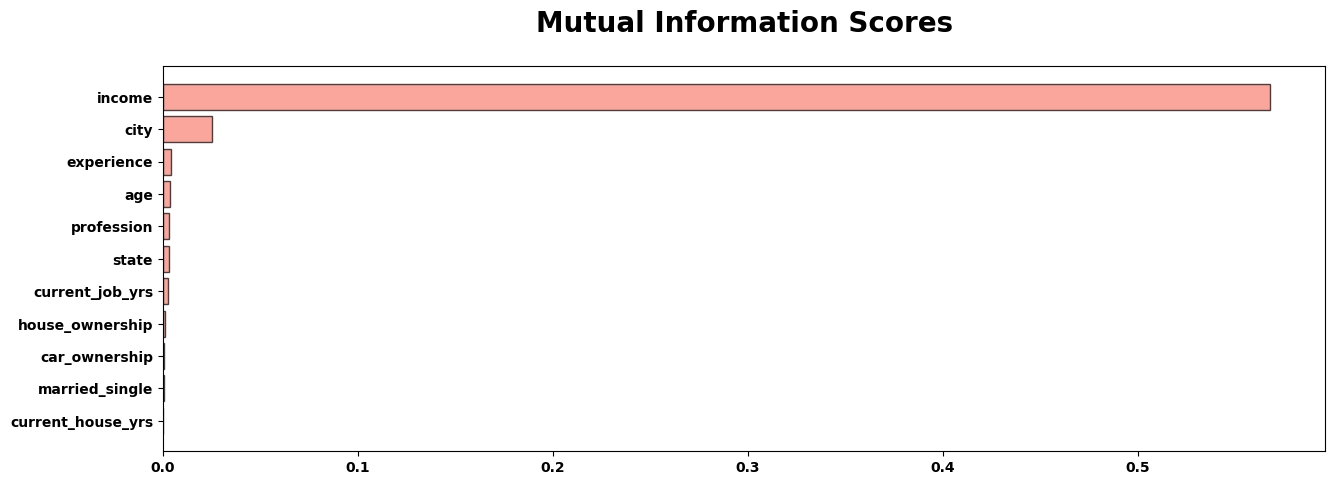

In [ ]:
# variables
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
# plotting
plt.figure(figsize=(15, 5))
plt.barh(width, scores, color="salmon", alpha=0.7, edgecolor="k")
plt.yticks(width, ticks, weight="bold", )
plt.xticks(weight="bold")
plt.title("Mutual Information Scores",
          weight="bold",
          fontsize=20,
          pad=25);

In [ ]:
# For now, let's just use income - current_job_yrs column
# I'll update and maybe use feature engineering in the future
features = ["income", "city", "experience", "age",
            "state", "profession", "current_job_yrs"]

X_features = loan[features]
y_labels = loan["risk_flag"]

X_features.shape, y_labels.shape

((61992, 7), (61992,))

In [ ]:
X_features.head()

,income,city,experience,age,state,profession,current_job_yrs
Id,,,,,,,
95248,961937,25,13,57,22,27,5
172687,2213599,42,4,39,5,38,4
49811,7783136,190,13,44,23,37,9
71724,3779002,16,8,57,14,27,8
36572,8896315,16,5,27,14,5,5


In [ ]:
y_labels.value_counts()

0    30996
1    30996
Name: risk_flag, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, random_state=42,
    test_size=.25, stratify=y_labels
)

print(f"X_train shape: {X_train.shape} \n"
       f"X_test shape: {X_test.shape} \n"
       f"y_train shape: {y_train.shape} \n"
       f"y_test.shape: {y_test.shape}")

X_train shape: (46494, 7) 
X_test shape: (15498, 7) 
y_train shape: (46494,) 
y_test.shape: (15498,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Parameter
parameter = {
    "max_depth": [int(x) for x in np.linspace(2, 24, 2)],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf"  : [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"]
}

# models
model = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                           param_distributions=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(f"model train score: {model.score(X_train, y_train)},\n"
      f"model test score: {model.score(X_test, y_test)},\n"
      f"model best score: {model.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 24],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   verbose=1)

model train score: 0.9234309803415495,
model test score: 0.8599819331526649,
model best score: 0.8370327354067192


In [ ]:
model.best_params_

{'splitter': 'random',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 24,
 'criterion': 'gini'}

In [ ]:
best_model = model.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=24, max_features='sqrt', min_samples_split=5,
                       random_state=42, splitter='random')

In [ ]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7697
           1       0.86      0.86      0.86      7801

    accuracy                           0.86     15498
   macro avg       0.86      0.86      0.86     15498
weighted avg       0.86      0.86      0.86     15498



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_pred_rf, y_test))



##Here we can see that the Random Forest Classifier is giving us better accuracy so it's always better to test out multiple classification models and compare accuracy.